#  E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

## Importing required libraries

In [8]:
# Let's load the required libraries

import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from  sklearn.preprocessing import LabelEncoder
import plotly.express as px


#importing warnings
import warnings
warnings.filterwarnings("ignore")

## Importing our dataset

In [9]:
data = pd.read_excel('customer_retention_dataset.xlsx','datasheet')
encoded_data = pd.read_excel('customer_retention_dataset.xlsx','codedsheet')

In [10]:
data.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

  11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                      Google chrome                                                                                 
1                                      Google chrome       

In [11]:
encoded_data.head()

1Gender of respondent  2 How old are you?   \
0                      0                    3   
1                      1                    2   
2                      1                    2   
3                      0                    2   
4                      1                    2   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

   5 Since How Long You are Shopping Online ?  \
0                                           5   
1                                           5   
2                                           4   
3                                           4   
4                                           3   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  4                       
1                                                  5                       
2                                                  5                       
3                                                  1                       
4                                                  2                       

   7 How do you access the internet while shopping on-line?  \
0                                                  4          
1                                                  2          
2                                                  3          
3                                                  3          
4                                                  2          

   8 Which device do you use to access the online shopping?  \
0                                                  3          
1                                                  1          
2                                                  1          
3                                                  1          
4                                                  1          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  5                                                      
1                                                  2                                                      
2                                                  4                                                      
3                                                  4                                                      
4                                                  2                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  1                                                        
1                                                  3                                                        
2                                                  2                                                        
3                                                  3                                                        
4                                                  3                                                        

   11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                                  1                                                                                  
1         

In [12]:
# Let's check the shape of the dataset

print('Original Data :', data.shape)
print('Encoded Data :', encoded_data.shape)

Original Data : (269, 71)
Encoded Data : (269, 71)


In [13]:
# Let's check the column names

data.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [14]:
# Let's rename the new column names to the original datastes

columns = ['gender','age','city','pinCode','shoppingSince','shoppingFrequency','internetAccessibility','deviceUsed',
           'screenSize','OS', 'browserUsed','channelFirstUsed','loginMode','timeSpentDeciding','paymentMode','cancellingFrequency',
          'cancellationReason','contentReadability','similarProductInfo','sellerProductInfo','productInfoClarity','navigationEase',
          'loadingProcessingSpeed','userFrienlyInterface','conveninetPaymentMode','timelyFulfilmentTrust','custSupportResponse',
          'custPrivacyGuarantee','variousChannelResponses','benefit','enjoy','convenience','returnReplacementPolicy','loyaltyProgramsAccess',
          'infoSatisfaction','siteQualitySatisfaction','netBenefitSatisfaction','trust','productSeveralCategory','relevantProductInfo','monetarySavings',
          'patronizingConvenience','adventureSense','socialStatus','gratification','roleFulfilment','moneyWorthy','shoppedFrom','easyWebApp',
           'visuallyAppealingWebApp','productVariety','completeProductInfo','fastWebApp','reliableWebApp','quickPurchase','paymentOptionsAvailability',
           'fastDelivery','custInfoPrivacy','finInfoSecurity','perceivedTrustworthiness','multiChannelAssistance','longLoginTime','longDisplayTime',
           'latePriceDeclare','longLoadingTime','limitedPaymentMode','lateDelivery','webAppDesignChange','pageDisruption','webAppEfficiency',
           'recommendation']

data.columns = columns
encoded_data.columns = columns

In [15]:
data.head()

gender          age           city  pinCode  shoppingSince  \
0    Male  31-40 years          Delhi   110009  Above 4 years   
1  Female  21-30 years          Delhi   110030  Above 4 years   
2  Female  21-30 years  Greater Noida   201308      3-4 years   
3    Male  21-30 years        Karnal    132001      3-4 years   
4  Female  21-30 years     Bangalore    530068      2-3 years   

    shoppingFrequency internetAccessibility  deviceUsed  screenSize  \
0         31-40 times               Dial-up     Desktop      Others   
1  41 times and above                 Wi-Fi  Smartphone  4.7 inches   
2  41 times and above       Mobile Internet  Smartphone  5.5 inches   
3  Less than 10 times       Mobile Internet  Smartphone  5.5 inches   
4         11-20 times                 Wi-Fi  Smartphone  4.7 inches   

                      OS    browserUsed   channelFirstUsed        loginMode  \
0  Window/windows Mobile  Google chrome      Search Engine    Search Engine   
1                IOS/Mac  Google chrome      Search Engine  Via application   
2                Android  Google chrome      Search Engine  Via application   
3                IOS/Mac         Safari      Search Engine    Search Engine   
4                IOS/Mac         Safari  Content Marketing  Via application   

   timeSpentDeciding                         paymentMode cancellingFrequency  \
0          6-10 mins  E-wallets (Paytm, Freecharge etc.)           Sometimes   
1  more than 15 mins                  Credit/Debit cards     Very frequently   
2         11-15 mins  E-wallets (Paytm, Freecharge etc.)           Sometimes   
3          6-10 mins                  Credit/Debit cards               Never   
4  more than 15 mins                  Credit/Debit cards          Frequently   

          cancellationReason  contentReadability  similarProductInfo  \
0              Lack of trust           Agree (4)     Indifferent (3)   
1  Promo code not applicable  Strongly agree (5)  Strongly agree (5)   
2  Promo code not applicable  Strongly agree (5)           Agree (4)   
3   Better alternative offer           Agree (4)           Agree (4)   
4   Better alternative offer  Strongly agree (5)     Indifferent (3)   

    sellerProductInfo  productInfoClarity      navigationEase  \
0     Indifferent (3)           Agree (4)           Agree (4)   
1  Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
2           Agree (4)           Agree (4)           Agree (4)   
3     Indifferent (3)           Agree (4)  Strongly agree (5)   
4     Indifferent (3)           Agree (4)           Agree (4)   

  loadingProcessingSpeed userFrienlyInterface conveninetPaymentMode  \
0  Strongly disagree (1)        Dis-agree (2)         Dis-agree (2)   
1     Strongly agree (5)   Strongly agree (5)    Strongly agree (5)   
2              Agree (4)   Strongly agree (5)    Strongly agree (5)   
3              Agree (4)   Strongly agree (5)    Strongly agree (5)   
4     Strongly agree (5)   Strongly agree (5)    Strongly agree (5)   

  timelyFulfilmentTrust custSupportResponse custPrivacyGuarantee  \
0          Disagree (2)  Strongly agree (5)            Agree (4)   
1    Strongly agree (5)  Strongly agree (5)   Strongly agree (5)   
2    Strongly agree (5)  Strongly agree (5)   Strongly agree (5)   
3             Agree (4)  Strongly agree (5)   Strongly agree (5)   
4             Agree (4)  Strongly agree (5)            Agree (4)   

  variousChannelResponses             benefit                  enjoy  \
0               Agree (4)     indifferent (3)  Strongly disagree (1)   
1      Strongly agree (5)  Strongly agree (5)     Strongly agree (5)   
2      Strongly agree (5)  Strongly agree (5)     Strongly agree (5)   
3               Agree (4)           Agree (4)        indifferent (3)   
4      Strongly agree (5)  Strongly agree (5)     Strongly agree (5)   

          convenience returnReplacementPolicy loyaltyProgramsAccess  \
0       Dis-agree (2)           Dis-agree (2)             Agree (

In [16]:
# Let's replace the redundant values

data.replace('indifferent (3)','Indifferent (3)',inplace=True)
data.replace('indifferent  (3)','Indifferent (3)',inplace=True)
data.replace('Dis-agree (2)','Disagree (2)',inplace=True)

In [17]:
# Let's check the general information from the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   gender                      269 non-null    object
 1   age                         269 non-null    object
 2   city                        269 non-null    object
 3   pinCode                     269 non-null    int64 
 4   shoppingSince               269 non-null    object
 5   shoppingFrequency           269 non-null    object
 6   internetAccessibility       269 non-null    object
 7   deviceUsed                  269 non-null    object
 8   screenSize                  269 non-null    object
 9   OS                          269 non-null    object
 10  browserUsed                 269 non-null    object
 11  channelFirstUsed            269 non-null    object
 12  loginMode                   269 non-null    object
 13  timeSpentDeciding           269 non-null    object

In [18]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   gender                      269 non-null    int64 
 1   age                         269 non-null    int64 
 2   city                        269 non-null    object
 3   pinCode                     269 non-null    int64 
 4   shoppingSince               269 non-null    int64 
 5   shoppingFrequency           269 non-null    int64 
 6   internetAccessibility       269 non-null    int64 
 7   deviceUsed                  269 non-null    int64 
 8   screenSize                  269 non-null    int64 
 9   OS                          269 non-null    int64 
 10  browserUsed                 269 non-null    int64 
 11  channelFirstUsed            269 non-null    int64 
 12  loginMode                   269 non-null    int64 
 13  timeSpentDeciding           269 non-null    int64 

In [19]:
# Let's check the datatype of each feature

data.columns.groupby(data.dtypes)

{int64: ['pinCode'], object: ['gender', 'age', 'city', 'shoppingSince', 'shoppingFrequency', 'internetAccessibility', 'deviceUsed', 'screenSize', 'OS', 'browserUsed', 'channelFirstUsed', 'loginMode', 'timeSpentDeciding', 'paymentMode', 'cancellingFrequency', 'cancellationReason', 'contentReadability', 'similarProductInfo', 'sellerProductInfo', 'productInfoClarity', 'navigationEase', 'loadingProcessingSpeed', 'userFrienlyInterface', 'conveninetPaymentMode', 'timelyFulfilmentTrust', 'custSupportResponse', 'custPrivacyGuarantee', 'variousChannelResponses', 'benefit', 'enjoy', 'convenience', 'returnReplacementPolicy', 'loyaltyProgramsAccess', 'infoSatisfaction', 'siteQualitySatisfaction', 'netBenefitSatisfaction', 'trust', 'productSeveralCategory', 'relevantProductInfo', 'monetarySavings', 'patronizingConvenience', 'adventureSense', 'socialStatus', 'gratification', 'roleFulfilment', 'moneyWorthy', 'shoppedFrom', 'easyWebApp', 'visuallyAppealingWebApp', 'productVariety', 'completeProductInf

In [20]:
# Let's check the null values in our dataset

data.isnull().sum()

gender                0
age                   0
city                  0
pinCode               0
shoppingSince         0
                     ..
lateDelivery          0
webAppDesignChange    0
pageDisruption        0
webAppEfficiency      0
recommendation        0
Length: 71, dtype: int64

## We do not have any null values in our dataset

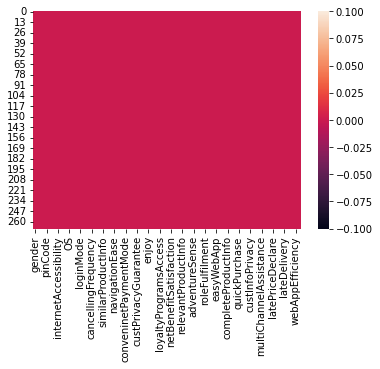

In [21]:
# Let's plot the Heat map to visualise the null values

sns.heatmap(data.isnull());

In [22]:
# Let's check the  categorical and continuos variables in our dataset

categorical=[x for x in data.columns if data[x].dtype==object]
print(len(categorical))
continous=[x for x in data.columns if x not in categorical]
print(len(continous))


70
1


## We can observe that we have only one numeral datatype rest all are catagoriacal datatypes

In [23]:
# Let's check the statistical summary

data.describe()

pinCode
count     269.000000
mean   220465.747212
std    140524.341051
min    110008.000000
25%    122018.000000
50%    201303.000000
75%    201310.000000
max    560037.000000

In [24]:
# Let's describe the object types

data.describe(include='object')

gender          age   city  shoppingSince   shoppingFrequency  \
count      269          269    269            269                 269   
unique       2            5     11              5                   6   
top     Female  31-40 years  Delhi  Above 4 years  Less than 10 times   
freq       181           81     58             98                 114   

       internetAccessibility  deviceUsed screenSize                     OS  \
count                    269         269        269                    269   
unique                     4           4          4                      3   
top          Mobile internet  Smartphone     Others  Window/windows Mobile   
freq                     142         141        134                    122   

          browserUsed channelFirstUsed      loginMode  timeSpentDeciding  \
count             269              269            269                269   
unique              4                3              5                  5   
top     Google chrome    Search Engine  Search Engine  more than 15 mins   
freq              216              230             87                123   

               paymentMode cancellingFrequency        cancellationReason  \
count                  269                 269                       269   
unique                   3                   4                         5   
top     Credit/Debit cards           Sometimes  Better alternative offer   
freq                   148                 171                       133   

        contentReadability  similarProductInfo sellerProductInfo  \
count                  269                 269               269   
unique                   4                   4                 5   
top     Strongly agree (5)  Strongly agree (5)         Agree (4)   
freq                   164                 116               101   

       productInfoClarity      navigationEase loadingProcessingSpeed  \
count                 269                 269                    269   
unique                  4                   4                      5   
top             Agree (4)  Strongly agree (5)     Strongly agree (5)   
freq                  132                 141                    115   

       userFrienlyInterface conveninetPaymentMode timelyFulfilmentTrust  \
count                   269                   269                   269   
unique                    5                     3                     4   
top      Strongly agree (5)    Strongly agree (5)    Strongly agree (5)   
freq                    189                   159                   141   

       custSupportResponse custPrivacyGuarantee variousChannelResponses  \
count                  269                  269                     269   
unique                   4                    3                       4   
top     Strongly agree (5)   Strongly agree (5)      Strongly agree (5)   
freq                   194                  185                     149   

                   benefit               enjoy         convenience  \
count                  269                 269                 269   
unique                   5                   5                   4   
top     Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
freq                   105                  86                 146   

       returnReplacementPolicy loyaltyProgramsAccess    infoSatisfaction  \
count                      269                   269                 269   
unique                       3                     5                   3   
top         Strongly agree (5)    Strongly agree (5)  Strongly agree (5)   
freq                       198                   115                 133   

       siteQualitySatisfaction netBenefitSatisfaction               trust  \
count                      269                    269                 269   
unique                       3                      4                   5   
top         Strongly agree (5)     Strongly agree (5)  Strongly agree (5

# DATA VISUALIZATION


## UNIVARIATE ANALYSIS

Female    67.0
Male      33.0
Name: gender, dtype: float64 2


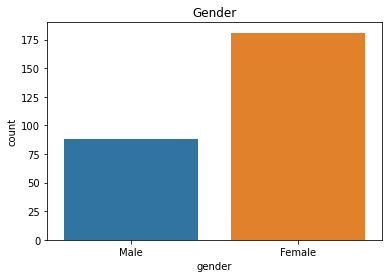

In [25]:
sns.countplot(data['gender'])
plt.title('Gender')
print(round(data['gender'].value_counts()/269*100),2)

Observation:
Out of the total, 67% customer are female

In [26]:
# Let's check in whihc city people shop the most

city_count = pd.DataFrame(data['city'].value_counts()).reset_index()
city_count.columns = ['city','count']


fig = px.bar(city_count, x='city',y='count',
           color='city',
           title = 'Online Shopping is preferred in which cities?')
fig.show(height=200,width=200)

Observation:
Delhite shops the most online, followed by Noida and Bangalore.

In [27]:
dataset = data[['age','city','gender']]

fig = px.histogram(dataset,x='city',color='gender',title='Online shopping in cities based on Gender:')
fig.show()

Observations:
Surprisingly, in Delhi and Noida, males prefer online shopping more than females. So we know our target audience in these cities,right?
Bulandshahr and Moradabad - both cities in UttarPradesh no female shoppers at all.

In [29]:
 def value_count(column):
    diff_count=len(data[column].value_counts())
    if diff_count<5:
        plt.figure(figsize=(10,5))
    elif diff_count<10:
        plt.figure(figsize=(10,6))
        plt.xticks(rotation=90)
    elif diff_count<20:
        plt.figure(figsize=(25,6))
        plt.xticks(rotation=90)
    else:
        plt.figure(figsize=(20,6))
        plt.xticks(rotation=90)
    sns.countplot(x=column,data=data,orient='v')
    plt.show()
    #checking percentage of data classification in each string attribute
    print(round(data[i].value_counts()/269*100),2)

In [30]:
fig = px.histogram(dataset,x='city',color='age',title='Online shopping in cities based on various age groups : ')
fig.show()

Observations:

In Delhi, people aged between 41-50 years, prefer to shop on online more, when compared to other age groups.

In Bangalore, it is people aged between 21-30 years of age.

In the rest of the cities, on an average, people aged between 31-40 years prefer online shopping, except Gurgaon where senior citizens are more involved.

In [31]:
# Let's check the Average Shopping frequency in last 1 year

fig = px.histogram(data,x='shoppingFrequency',color='shoppingSince',
                   color_discrete_map={'Above 4 years':'#40E0D0','3-4 years':'#DE3163','2-3 years':'#FF7F50',
                                       'Less than 1 year':'#FFBF00','1-2 years':'#DFFF00'})
fig.update_layout(title='Shopping frequency of people in past one year : ', title_x=0.5)
            
fig.show()

Observations:

In the past 1 year, on an average people have shopped approximately 30-40 times.

From the data, we can see that, people who have been shopping for more then 3-4 years are the ones who frequently shops.

In [32]:
# Let's check the Cancellation reasons

reasons = pd.DataFrame(data['cancellationReason'].value_counts()).reset_index()
reasons.columns = ['Reason','Count']

fig = go.Figure(go.Funnelarea(
    text = reasons['Reason'],
    values = reasons['Count'],
    marker = {"colors": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat"], "width": [0, 1, 5, 0, 4]}}
    ))

fig.update_layout(title = 'Reasons for not purchasing any product :',title_x=0.5)
fig.show()

Observations:

We can observe that most of the people, abandoned their cart as they were having better alternative offers.

People even abandon their carts, because they do not have their preferred mode of payment.

So when the preferred payment mode of people who cancel their cart was analysed, it appears that they preferred CoD, but was not available for that product, which can also imply that the customer may have some difficulty in trusting the retail store?

Lack of trust is also a reason for cancelling their product.

In [33]:
fig = px.histogram(data,x='cancellingFrequency',color='cancellationReason',
                   color_discrete_map={'Lack of trust':'#FF5722','Promo code not applicable':'#4DD0E1',
                                       'Better alternative offer':'#CDDC39','Change in price':'#FFEE58',
                                       'No preferred mode of payment':'#004D40'})
fig.update_layout(title='Why and how often do people abandon their carts? ', title_x=0.4)
            
fig.show()

In [34]:
fig = px.histogram(data,x='cancellationReason',color='paymentMode')
fig.update_layout(title='Payment Mode vs Cancellation Reasons : ', title_x=0.5)
            
fig.show()


Observations:

So when the preferred payment mode of people who cancel their cart was analysed, it appears that they preferred CoD, but was not available for that product, which can also imply that the customer may have some difficulty in trusting the retail store?
Lack of trust is also a reason for cancelling their product, and the payment mode is e-wallets, which they believe might not be reliable?

In [35]:
def value_count(column):
    diff_count=len(data[column].value_counts())
    if diff_count<5:
        plt.figure(figsize=(10,5))
    elif diff_count<10:
        plt.figure(figsize=(10,6))
        plt.xticks(rotation=90)
    elif diff_count<20:
        plt.figure(figsize=(25,6))
        plt.xticks(rotation=90)
    else:
        plt.figure(figsize=(20,6))
        plt.xticks(rotation=90)
    sns.countplot(x=column,data=data,orient='v')
    plt.show()
    
# Let's check the percentage of data classification in each string attribute
    print(round(data[i].value_counts()/269*100),2)

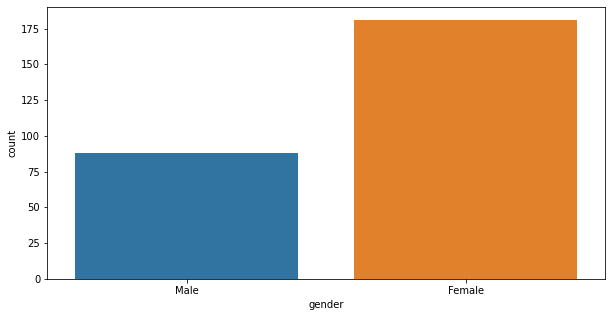

Female    67.0
Male      33.0
Name: gender, dtype: float64 2


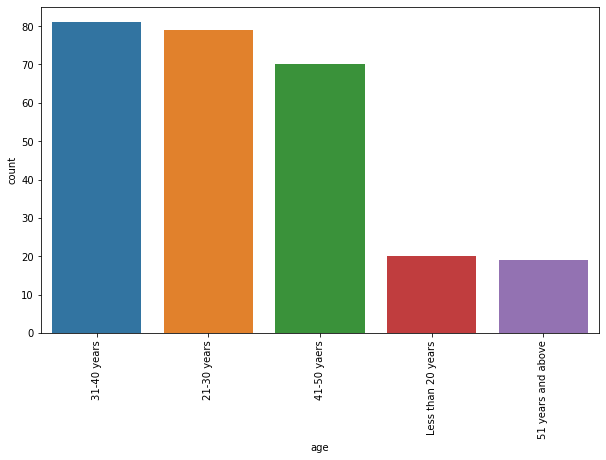

31-40 years           30.0
21-30 years           29.0
41-50 yaers           26.0
Less than 20 years     7.0
51 years and above     7.0
Name: age, dtype: float64 2


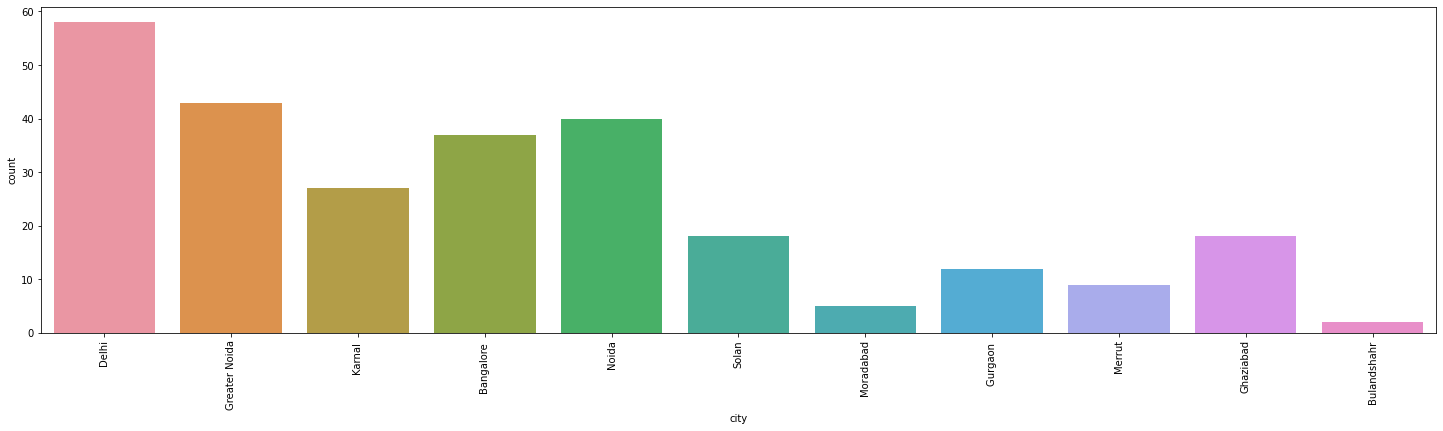

Delhi            22.0
Greater Noida    16.0
Noida            15.0
Bangalore        14.0
Karnal           10.0
Solan             7.0
Ghaziabad         7.0
Gurgaon           4.0
Merrut            3.0
Moradabad         2.0
Bulandshahr       1.0
Name: city, dtype: float64 2


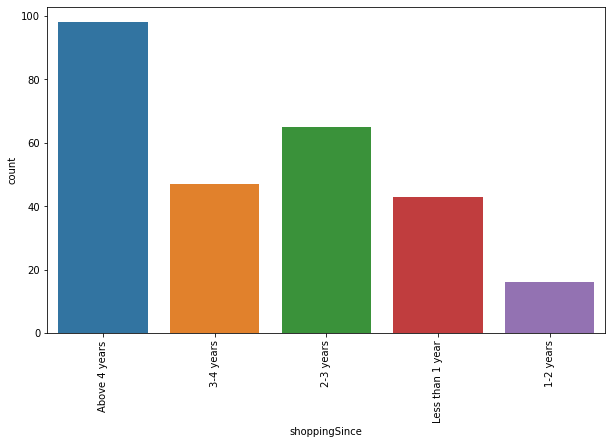

Above 4 years       36.0
2-3 years           24.0
3-4 years           17.0
Less than 1 year    16.0
1-2 years            6.0
Name: shoppingSince, dtype: float64 2


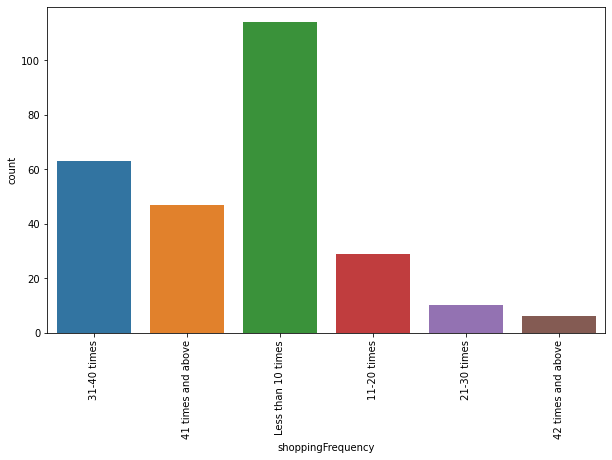

Less than 10 times    42.0
31-40 times           23.0
41 times and above    17.0
11-20 times           11.0
21-30 times            4.0
42 times and above     2.0
Name: shoppingFrequency, dtype: float64 2


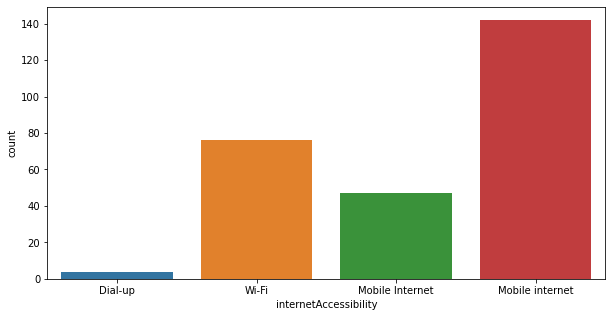

Mobile internet    53.0
Wi-Fi              28.0
Mobile Internet    17.0
Dial-up             1.0
Name: internetAccessibility, dtype: float64 2


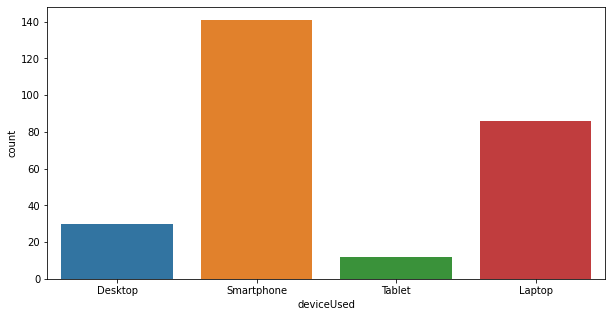

Smartphone    52.0
Laptop        32.0
Desktop       11.0
Tablet         4.0
Name: deviceUsed, dtype: float64 2


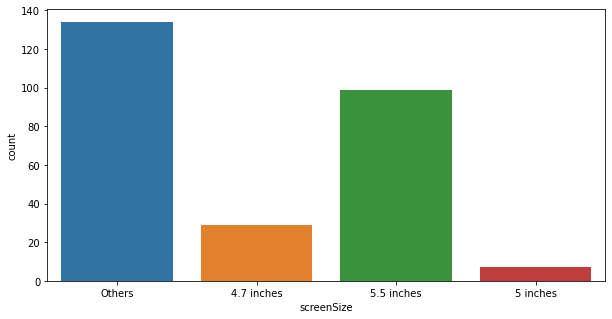

Others        50.0
5.5 inches    37.0
4.7 inches    11.0
5 inches       3.0
Name: screenSize, dtype: float64 2


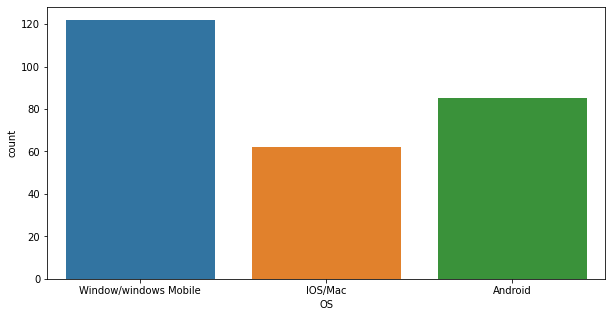

Window/windows Mobile    45.0
Android                  32.0
IOS/Mac                  23.0
Name: OS, dtype: float64 2


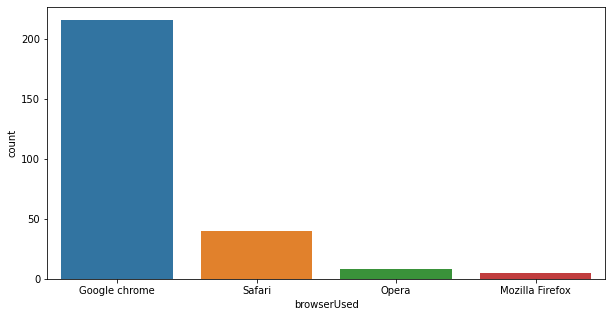

Google chrome      80.0
Safari             15.0
Opera               3.0
Mozilla Firefox     2.0
Name: browserUsed, dtype: float64 2


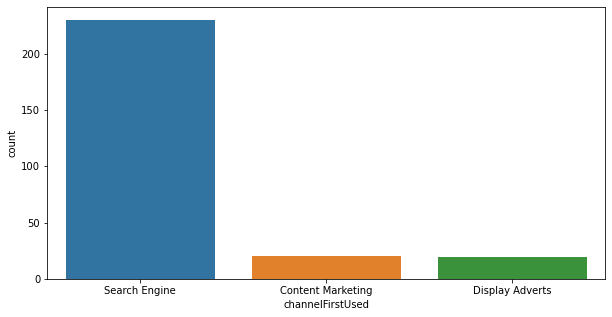

Search Engine        86.0
Content Marketing     7.0
Display Adverts       7.0
Name: channelFirstUsed, dtype: float64 2


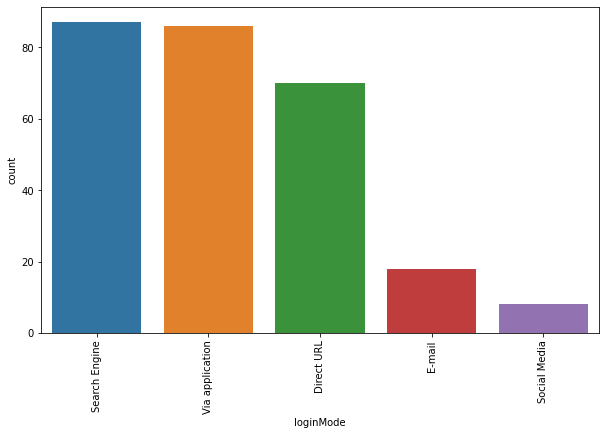

Search Engine      32.0
Via application    32.0
Direct URL         26.0
E-mail              7.0
Social Media        3.0
Name: loginMode, dtype: float64 2


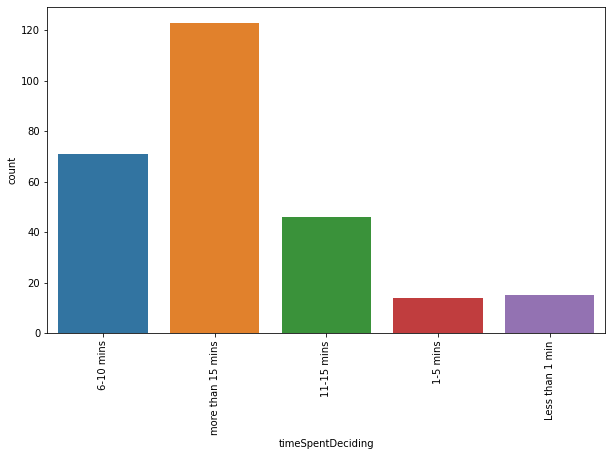

more than 15 mins    46.0
6-10 mins            26.0
11-15 mins           17.0
Less than 1 min       6.0
1-5 mins              5.0
Name: timeSpentDeciding, dtype: float64 2


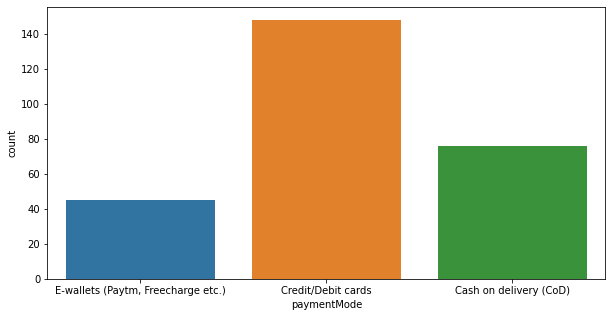

Credit/Debit cards                    55.0
Cash on delivery (CoD)                28.0
E-wallets (Paytm, Freecharge etc.)    17.0
Name: paymentMode, dtype: float64 2


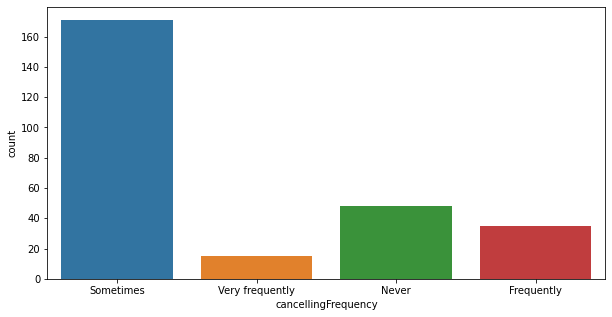

Sometimes          64.0
Never              18.0
Frequently         13.0
Very frequently     6.0
Name: cancellingFrequency, dtype: float64 2


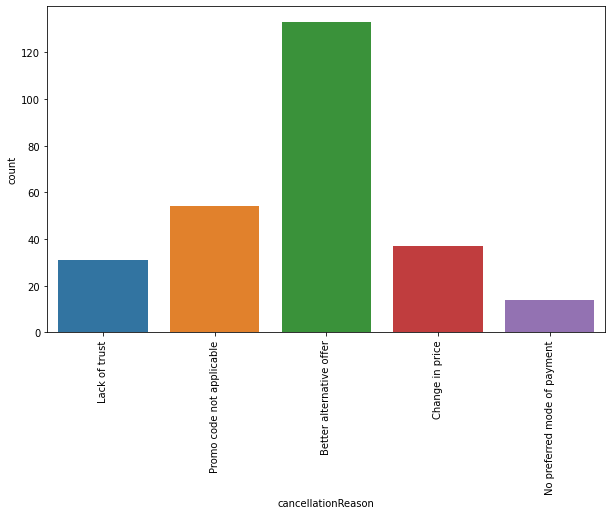

Better alternative offer        49.0
Promo code not applicable       20.0
Change in price                 14.0
Lack of trust                   12.0
No preferred mode of payment     5.0
Name: cancellationReason, dtype: float64 2


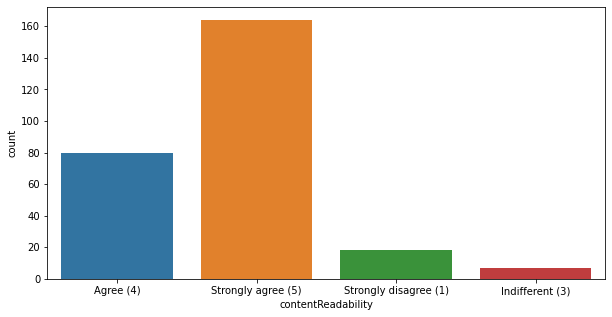

Strongly agree (5)       61.0
Agree (4)                30.0
Strongly disagree (1)     7.0
Indifferent (3)           3.0
Name: contentReadability, dtype: float64 2


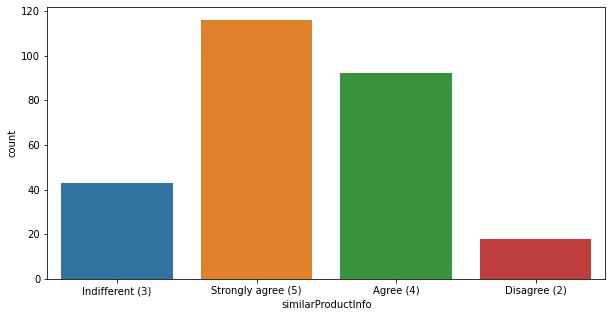

Strongly agree (5)    43.0
Agree (4)             34.0
Indifferent (3)       16.0
Disagree (2)           7.0
Name: similarProductInfo, dtype: float64 2


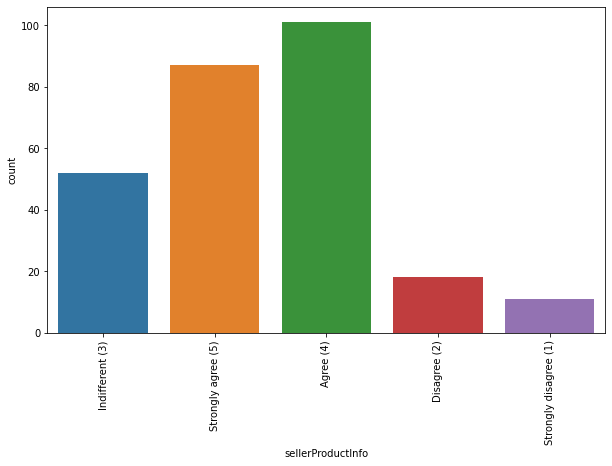

Agree (4)                38.0
Strongly agree (5)       32.0
Indifferent (3)          19.0
Disagree (2)              7.0
Strongly disagree (1)     4.0
Name: sellerProductInfo, dtype: float64 2


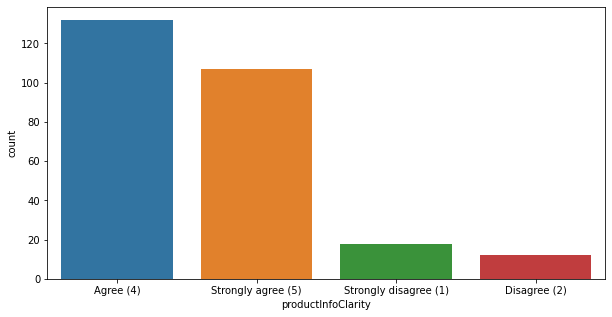

Agree (4)                49.0
Strongly agree (5)       40.0
Strongly disagree (1)     7.0
Disagree (2)              4.0
Name: productInfoClarity, dtype: float64 2


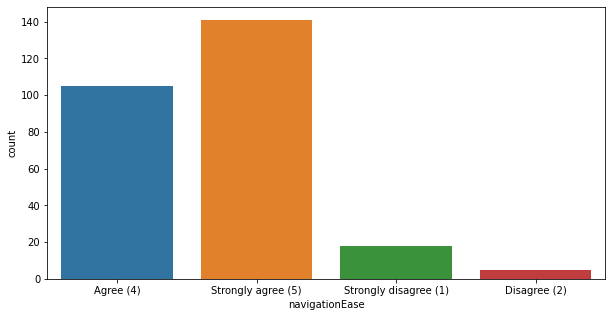

Strongly agree (5)       52.0
Agree (4)                39.0
Strongly disagree (1)     7.0
Disagree (2)              2.0
Name: navigationEase, dtype: float64 2


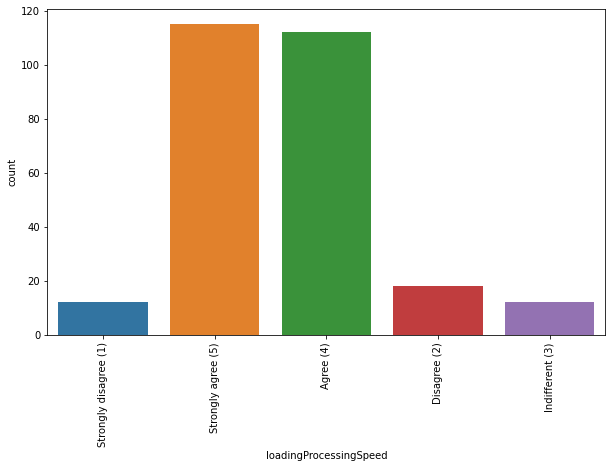

Strongly agree (5)       43.0
Agree (4)                42.0
Disagree (2)              7.0
Strongly disagree (1)     4.0
Indifferent (3)           4.0
Name: loadingProcessingSpeed, dtype: float64 2


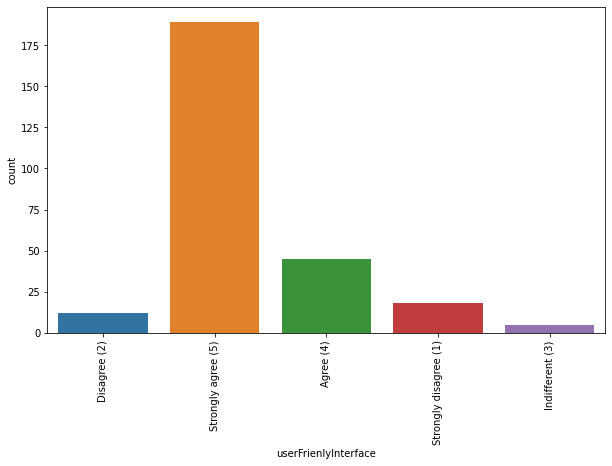

Strongly agree (5)       70.0
Agree (4)                17.0
Strongly disagree (1)     7.0
Disagree (2)              4.0
Indifferent (3)           2.0
Name: userFrienlyInterface, dtype: float64 2


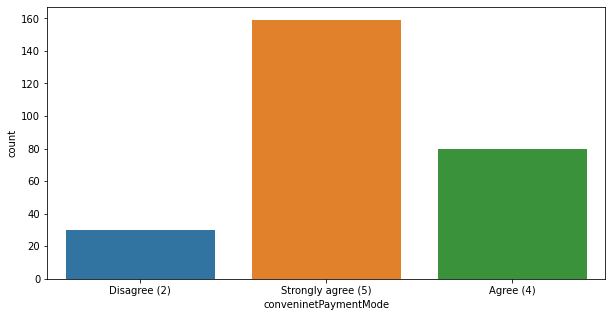

Strongly agree (5)    59.0
Agree (4)             30.0
Disagree (2)          11.0
Name: conveninetPaymentMode, dtype: float64 2


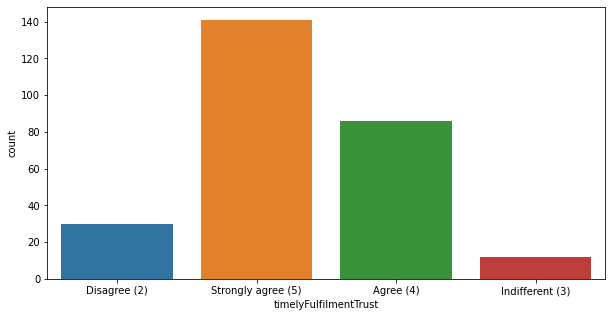

Strongly agree (5)    52.0
Agree (4)             32.0
Disagree (2)          11.0
Indifferent (3)        4.0
Name: timelyFulfilmentTrust, dtype: float64 2


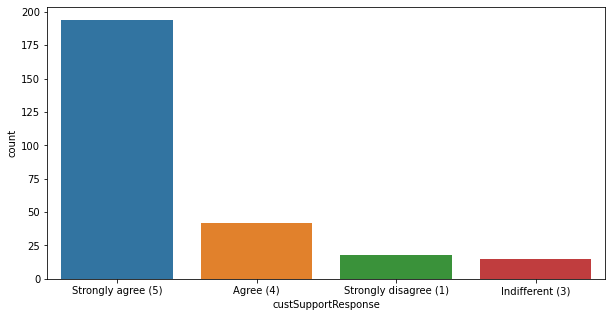

Strongly agree (5)       72.0
Agree (4)                16.0
Strongly disagree (1)     7.0
Indifferent (3)           6.0
Name: custSupportResponse, dtype: float64 2


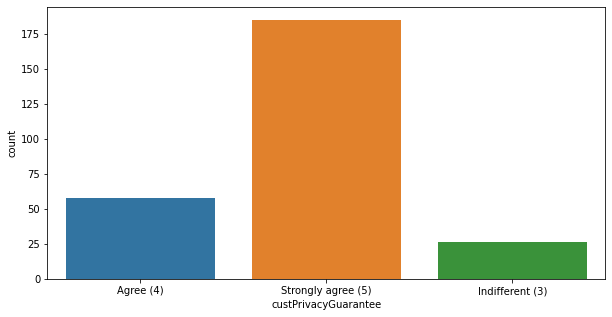

Strongly agree (5)    69.0
Agree (4)             22.0
Indifferent (3)       10.0
Name: custPrivacyGuarantee, dtype: float64 2


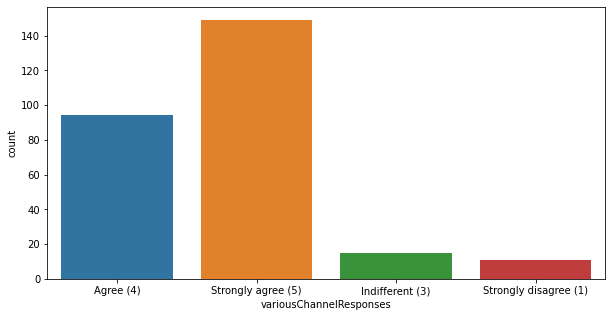

Strongly agree (5)       55.0
Agree (4)                35.0
Indifferent (3)           6.0
Strongly disagree (1)     4.0
Name: variousChannelResponses, dtype: float64 2


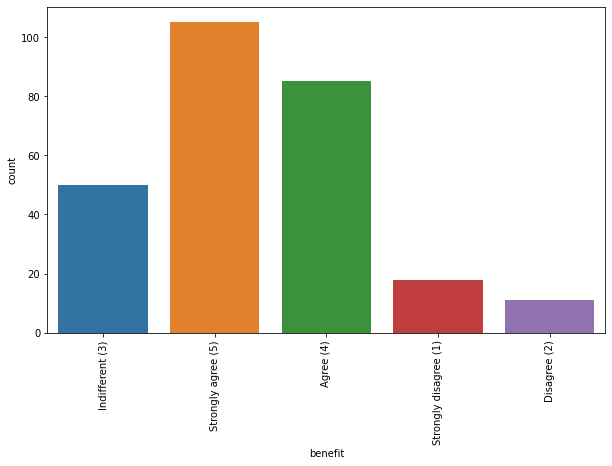

Strongly agree (5)       39.0
Agree (4)                32.0
Indifferent (3)          19.0
Strongly disagree (1)     7.0
Disagree (2)              4.0
Name: benefit, dtype: float64 2


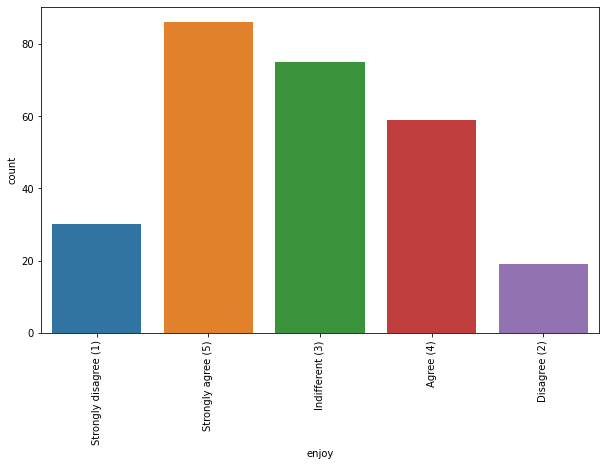

Strongly agree (5)       32.0
Indifferent (3)          28.0
Agree (4)                22.0
Strongly disagree (1)    11.0
Disagree (2)              7.0
Name: enjoy, dtype: float64 2


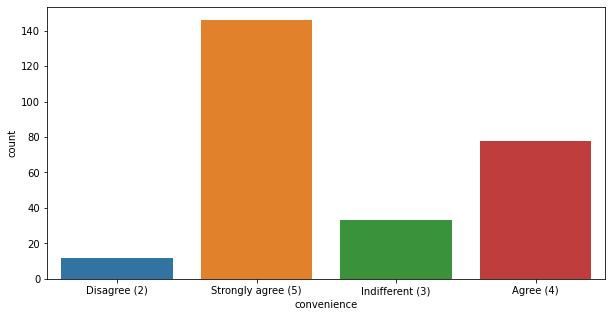

Strongly agree (5)    54.0
Agree (4)             29.0
Indifferent (3)       12.0
Disagree (2)           4.0
Name: convenience, dtype: float64 2


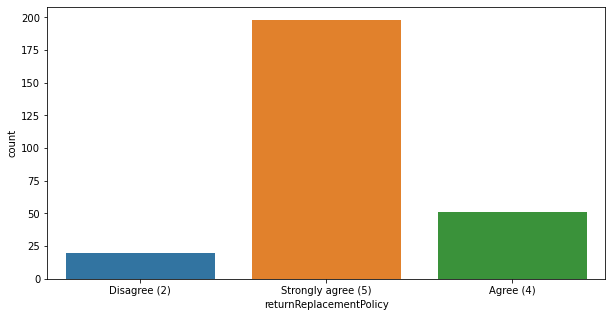

Strongly agree (5)    74.0
Agree (4)             19.0
Disagree (2)           7.0
Name: returnReplacementPolicy, dtype: float64 2


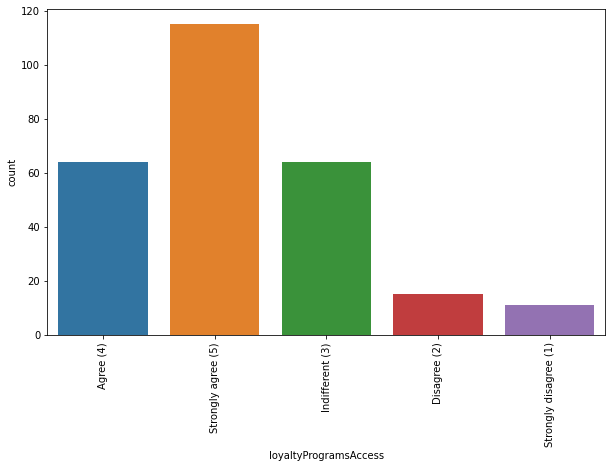

Strongly agree (5)       43.0
Agree (4)                24.0
Indifferent (3)          24.0
Disagree (2)              6.0
Strongly disagree (1)     4.0
Name: loyaltyProgramsAccess, dtype: float64 2


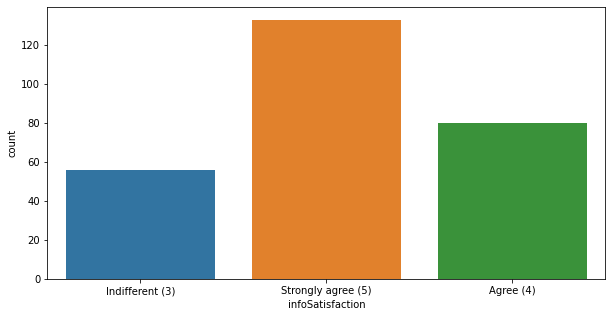

Strongly agree (5)    49.0
Agree (4)             30.0
Indifferent (3)       21.0
Name: infoSatisfaction, dtype: float64 2


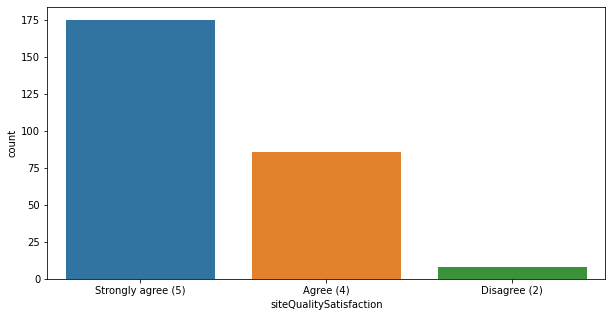

Strongly agree (5)    65.0
Agree (4)             32.0
Disagree (2)           3.0
Name: siteQualitySatisfaction, dtype: float64 2


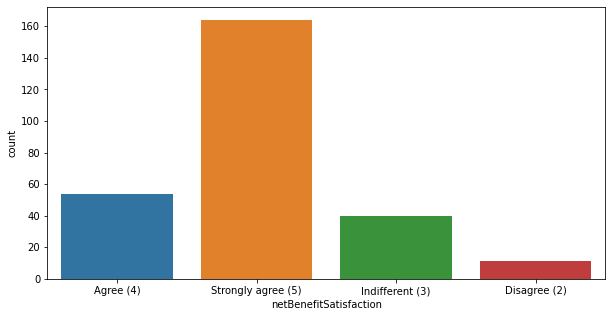

Strongly agree (5)    61.0
Agree (4)             20.0
Indifferent (3)       15.0
Disagree (2)           4.0
Name: netBenefitSatisfaction, dtype: float64 2


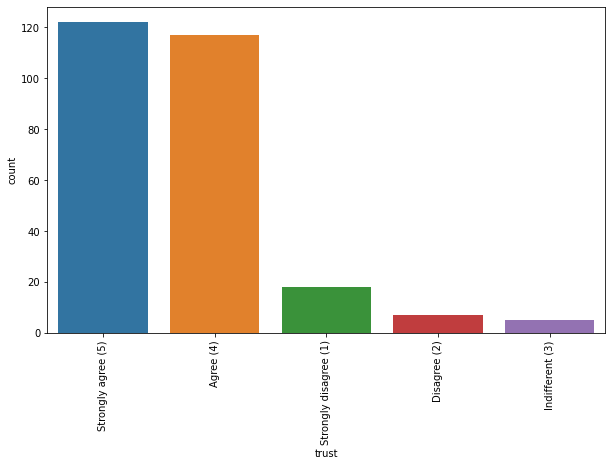

Strongly agree (5)       45.0
Agree (4)                43.0
Strongly disagree (1)     7.0
Disagree (2)              3.0
Indifferent (3)           2.0
Name: trust, dtype: float64 2


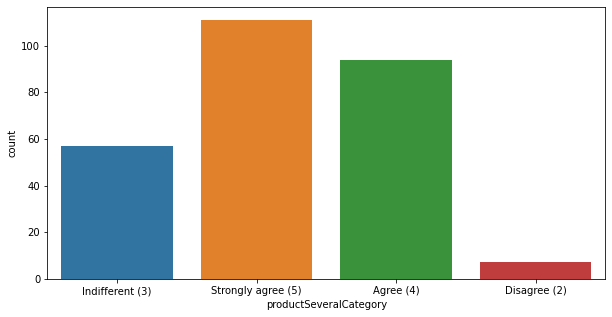

Strongly agree (5)    41.0
Agree (4)             35.0
Indifferent (3)       21.0
Disagree (2)           3.0
Name: productSeveralCategory, dtype: float64 2


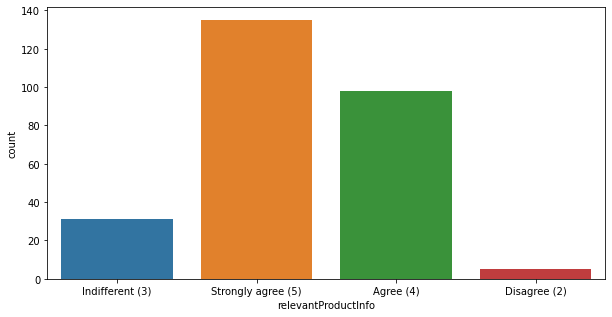

Strongly agree (5)    50.0
Agree (4)             36.0
Indifferent (3)       12.0
Disagree (2)           2.0
Name: relevantProductInfo, dtype: float64 2


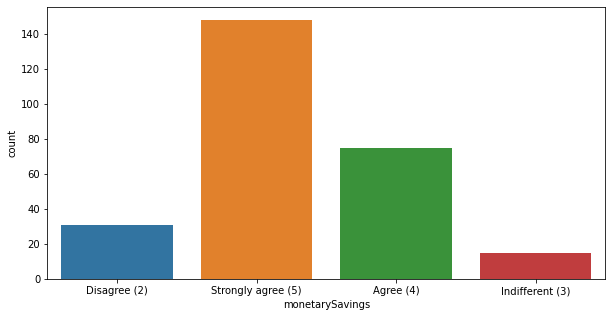

Strongly agree (5)    55.0
Agree (4)             28.0
Disagree (2)          12.0
Indifferent (3)        6.0
Name: monetarySavings, dtype: float64 2


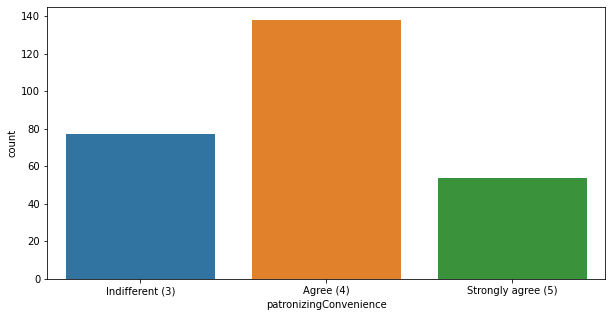

Agree (4)             51.0
Indifferent (3)       29.0
Strongly agree (5)    20.0
Name: patronizingConvenience, dtype: float64 2


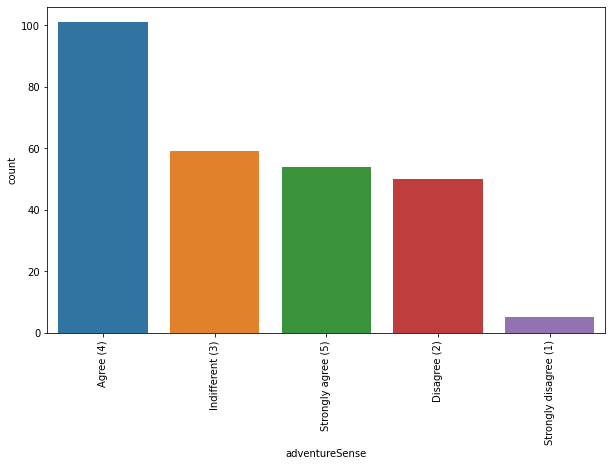

Agree (4)                38.0
Indifferent (3)          22.0
Strongly agree (5)       20.0
Disagree (2)             19.0
Strongly disagree (1)     2.0
Name: adventureSense, dtype: float64 2


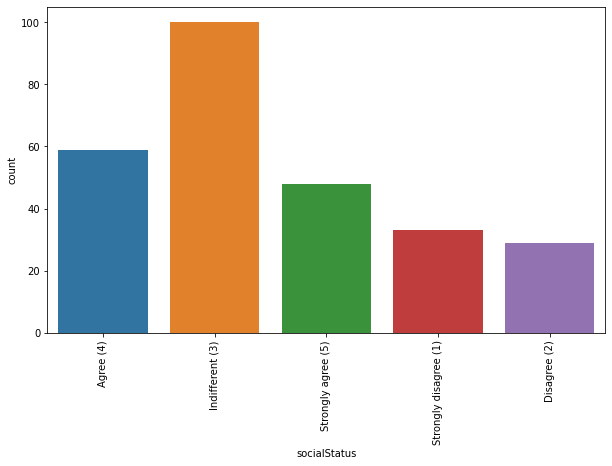

Indifferent (3)          37.0
Agree (4)                22.0
Strongly agree (5)       18.0
Strongly disagree (1)    12.0
Disagree (2)             11.0
Name: socialStatus, dtype: float64 2


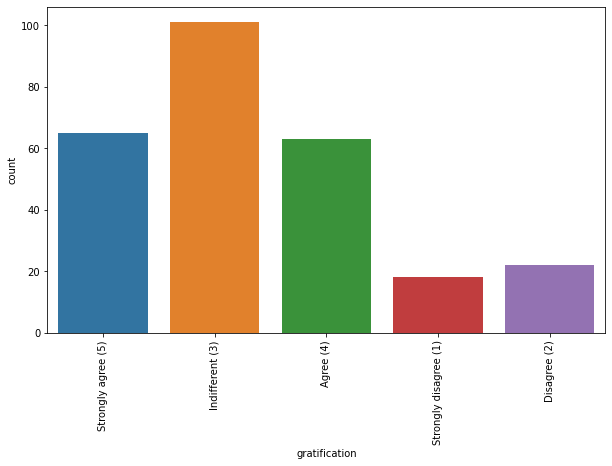

Indifferent (3)          38.0
Strongly agree (5)       24.0
Agree (4)                23.0
Disagree (2)              8.0
Strongly disagree (1)     7.0
Name: gratification, dtype: float64 2


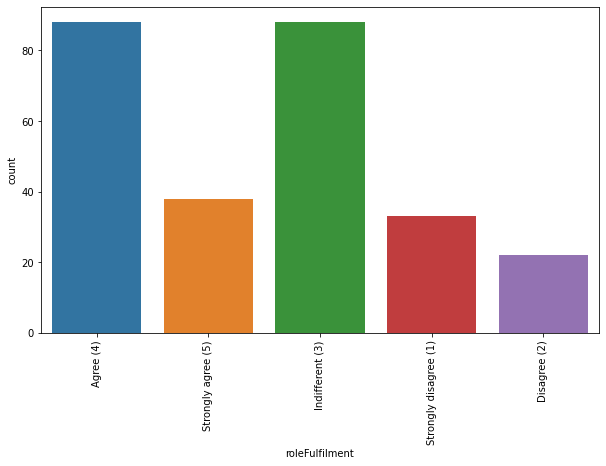

Agree (4)                33.0
Indifferent (3)          33.0
Strongly agree (5)       14.0
Strongly disagree (1)    12.0
Disagree (2)              8.0
Name: roleFulfilment, dtype: float64 2


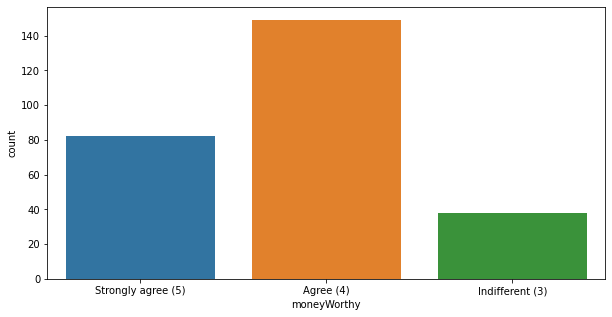

Agree (4)             55.0
Strongly agree (5)    30.0
Indifferent (3)       14.0
Name: moneyWorthy, dtype: float64 2


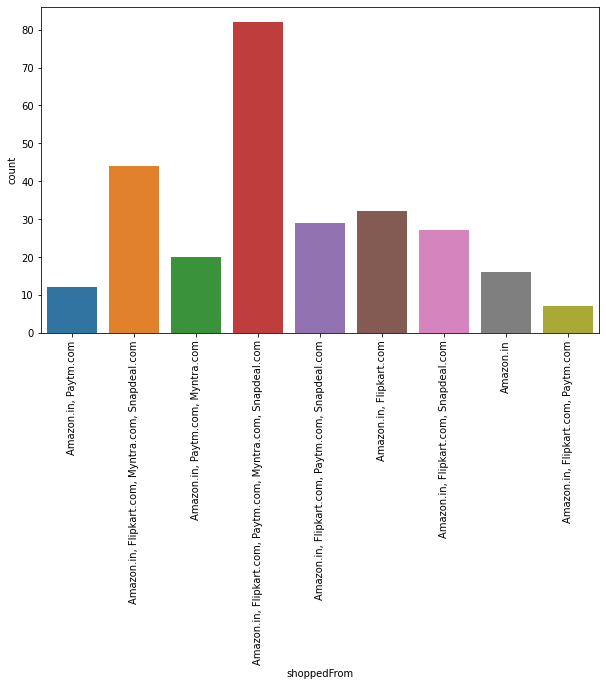

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               16.0
Amazon.in, Flipkart.com                                         12.0
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11.0
Amazon.in, Flipkart.com, Snapdeal.com                           10.0
Amazon.in, Paytm.com, Myntra.com                                 7.0
Amazon.in                                                        6.0
Amazon.in, Paytm.com                                             4.0
Amazon.in, Flipkart.com, Paytm.com                               3.0
Name: shoppedFrom, dtype: float64 2


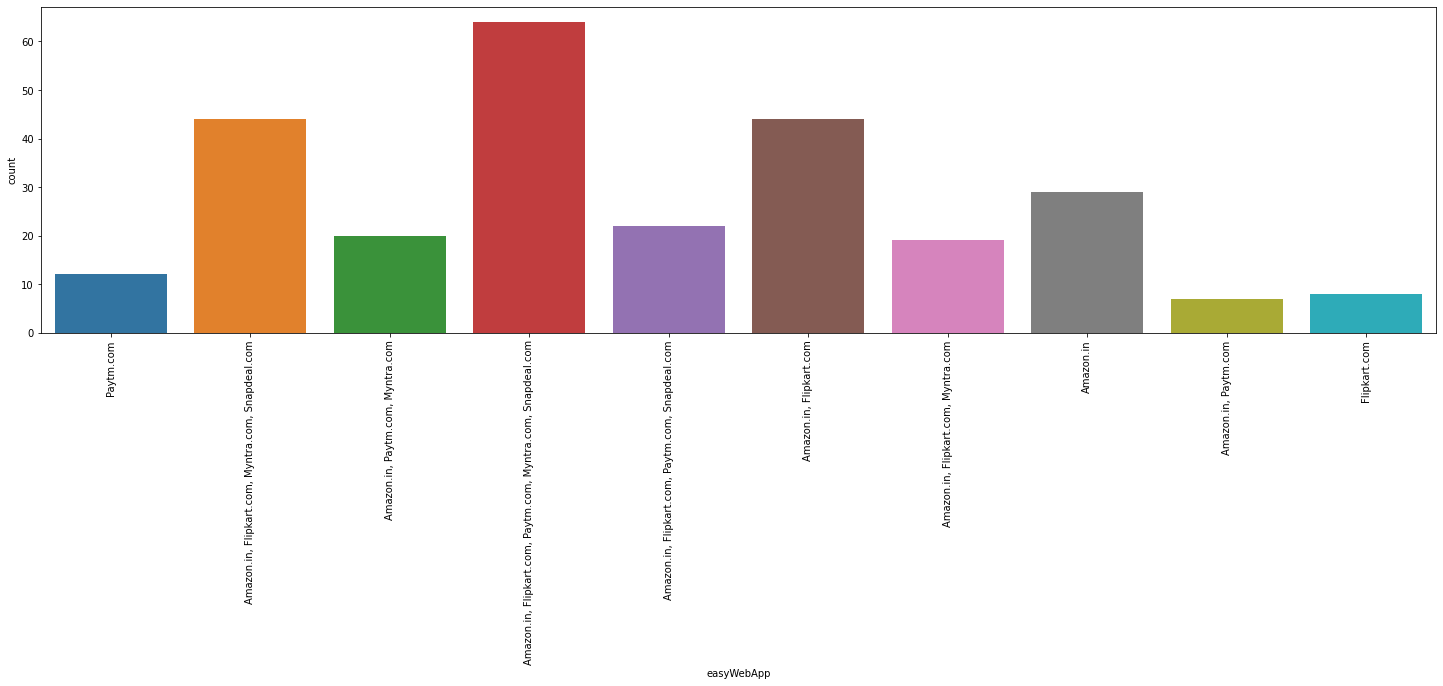

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               16.0
Amazon.in, Flipkart.com                                         16.0
Amazon.in                                                       11.0
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                 8.0
Amazon.in, Paytm.com, Myntra.com                                 7.0
Amazon.in, Flipkart.com, Myntra.com                              7.0
Paytm.com                                                        4.0
Flipkart.com                                                     3.0
Amazon.in, Paytm.com                                             3.0
Name: easyWebApp, dtype: float64 2


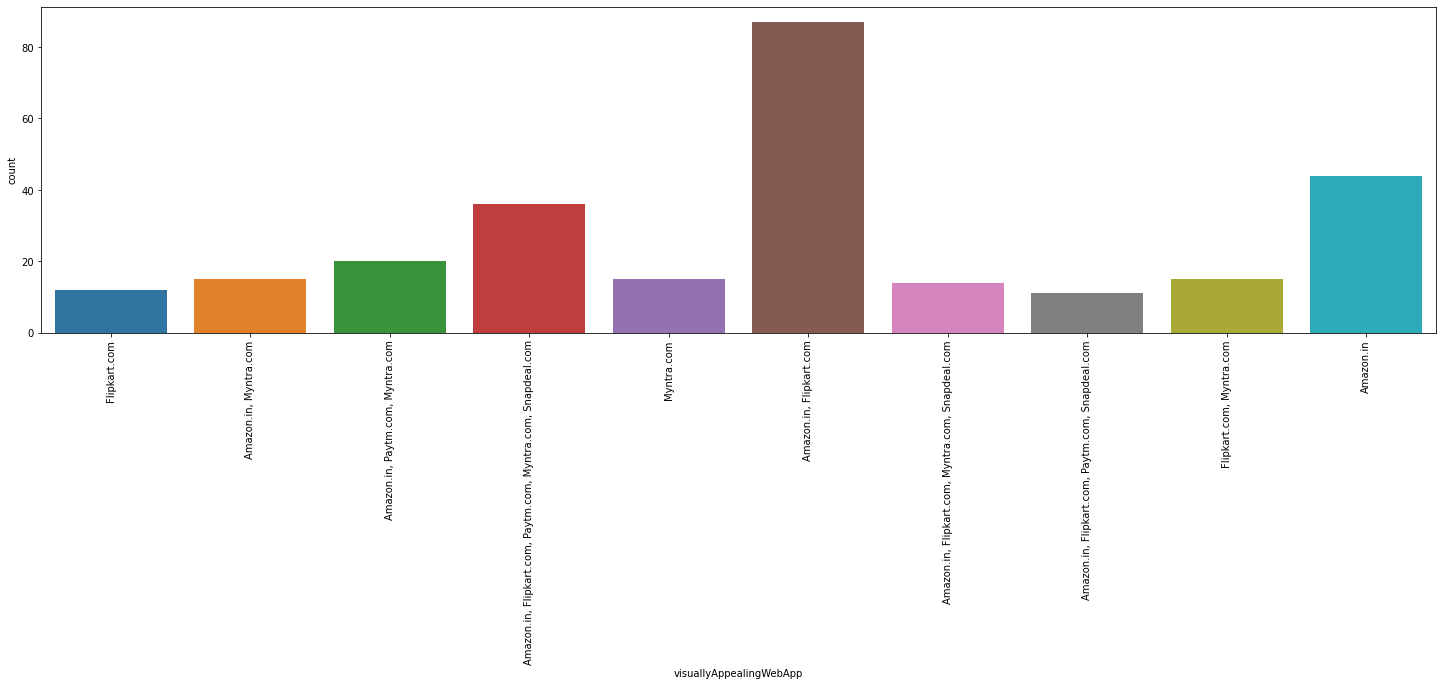

Amazon.in, Flipkart.com                                         32.0
Amazon.in                                                       16.0
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13.0
Amazon.in, Paytm.com, Myntra.com                                 7.0
Amazon.in, Myntra.com                                            6.0
Myntra.com                                                       6.0
Flipkart.com, Myntra.com                                         6.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5.0
Flipkart.com                                                     4.0
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                 4.0
Name: visuallyAppealingWebApp, dtype: float64 2


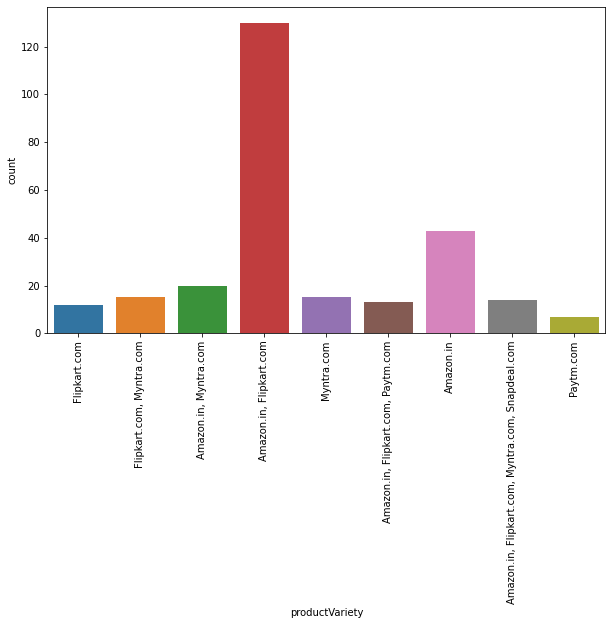

Amazon.in, Flipkart.com                              48.0
Amazon.in                                            16.0
Amazon.in, Myntra.com                                 7.0
Flipkart.com, Myntra.com                              6.0
Myntra.com                                            6.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     5.0
Amazon.in, Flipkart.com, Paytm.com                    5.0
Flipkart.com                                          4.0
Paytm.com                                             3.0
Name: productVariety, dtype: float64 2


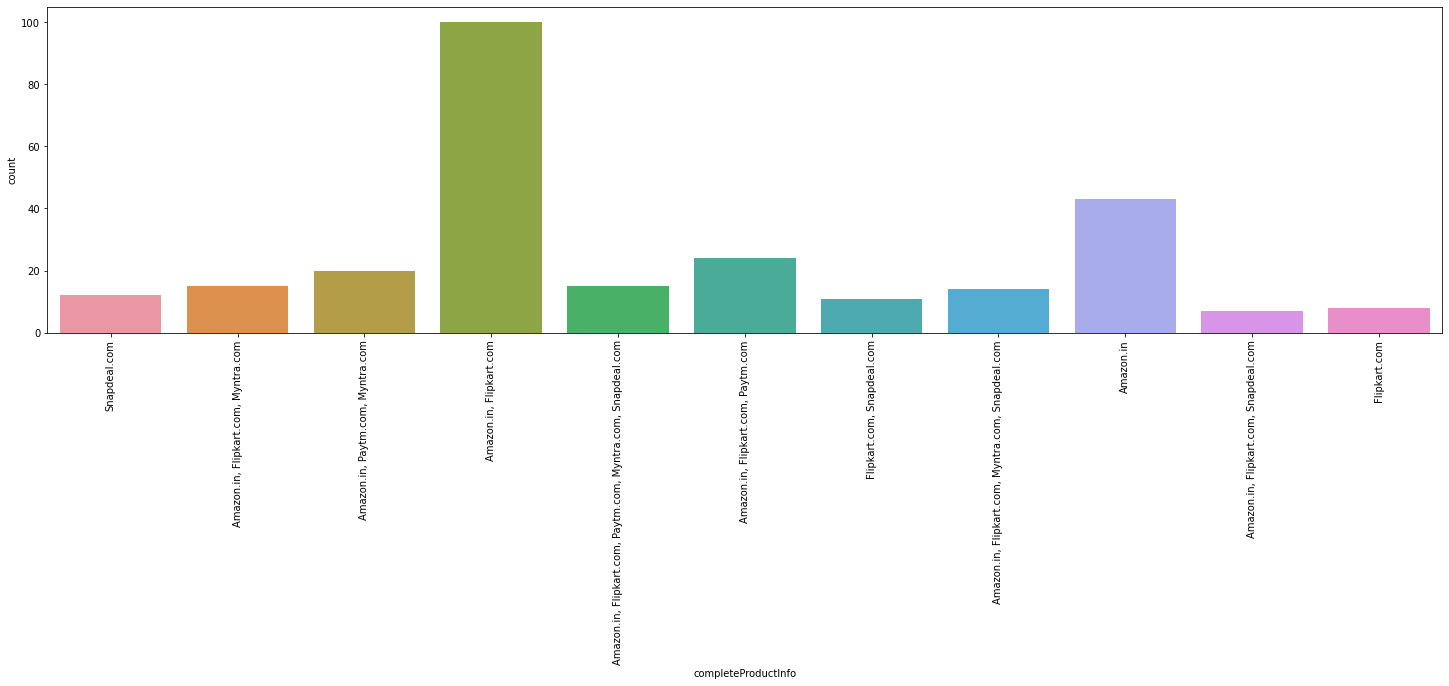

Amazon.in, Flipkart.com                                         37.0
Amazon.in                                                       16.0
Amazon.in, Flipkart.com, Paytm.com                               9.0
Amazon.in, Paytm.com, Myntra.com                                 7.0
Amazon.in, Flipkart.com, Myntra.com                              6.0
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     6.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5.0
Snapdeal.com                                                     4.0
Flipkart.com, Snapdeal.com                                       4.0
Flipkart.com                                                     3.0
Amazon.in, Flipkart.com, Snapdeal.com                            3.0
Name: completeProductInfo, dtype: float64 2


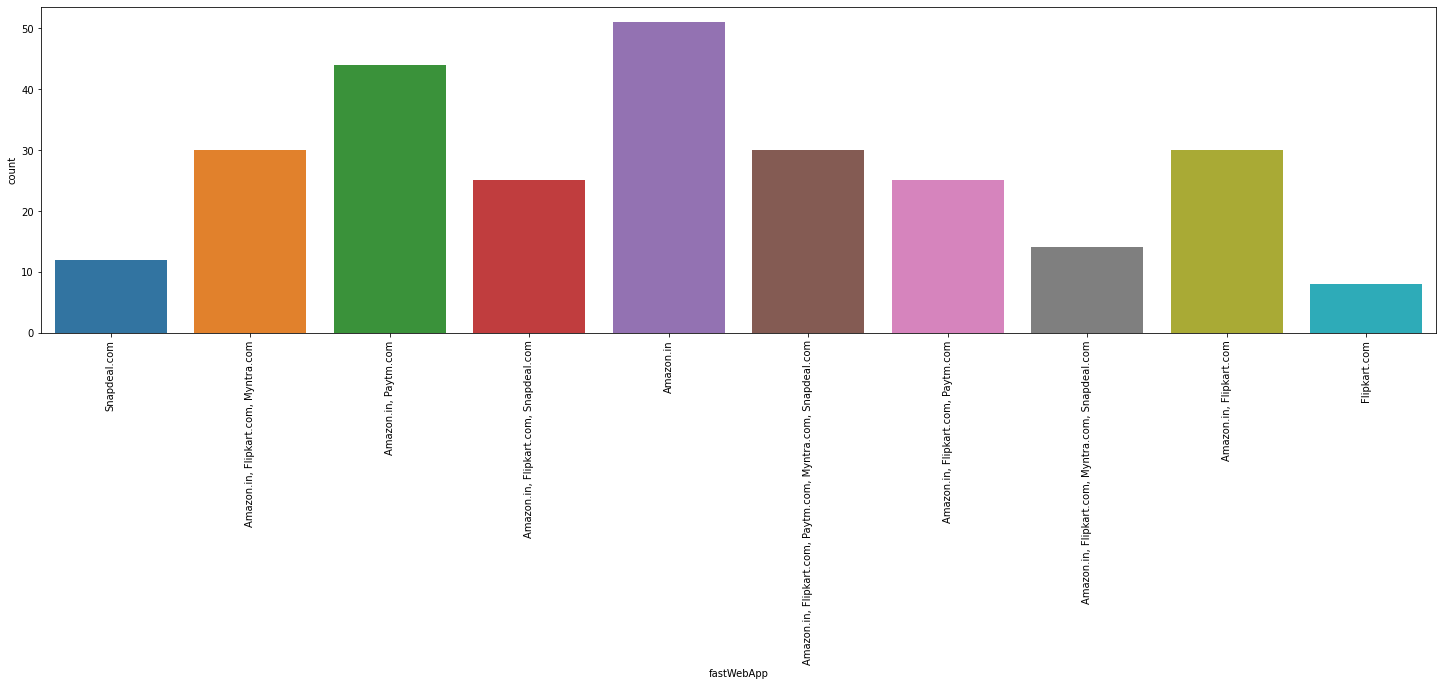

Amazon.in                                                       19.0
Amazon.in, Paytm.com                                            16.0
Amazon.in, Flipkart.com, Myntra.com                             11.0
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    11.0
Amazon.in, Flipkart.com                                         11.0
Amazon.in, Flipkart.com, Snapdeal.com                            9.0
Amazon.in, Flipkart.com, Paytm.com                               9.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5.0
Snapdeal.com                                                     4.0
Flipkart.com                                                     3.0
Name: fastWebApp, dtype: float64 2


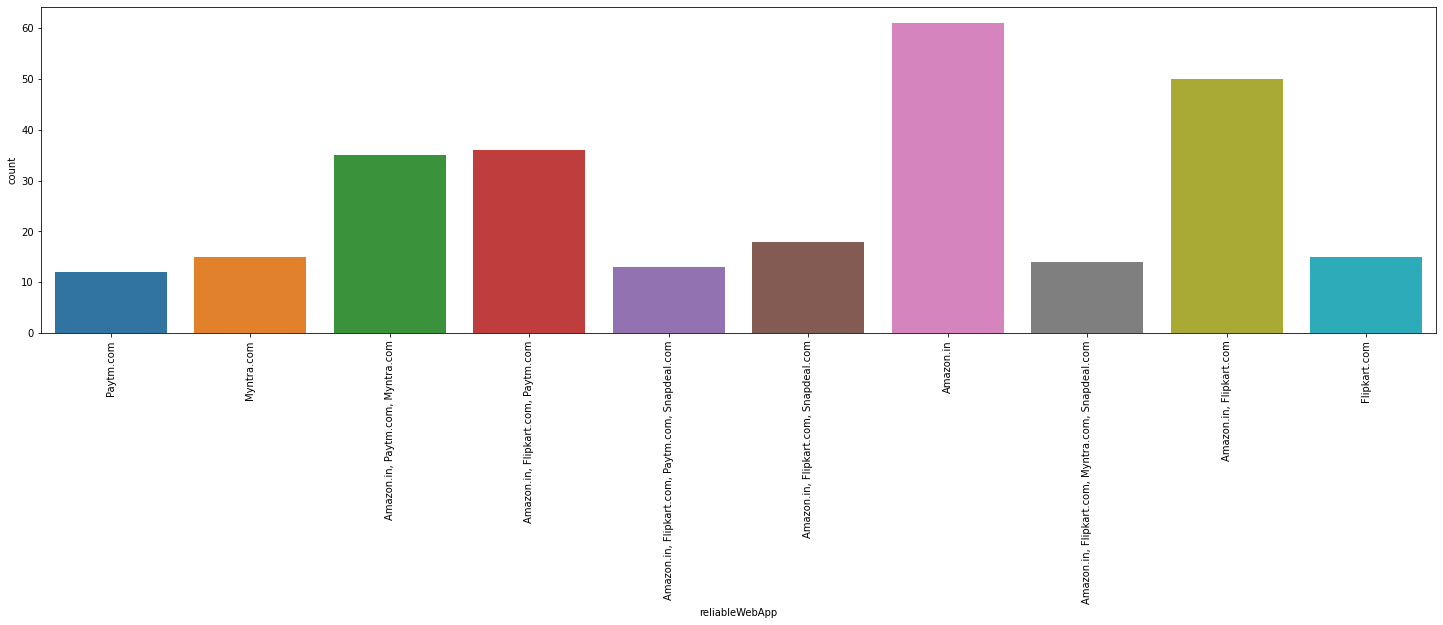

Amazon.in                                            23.0
Amazon.in, Flipkart.com                              19.0
Amazon.in, Flipkart.com, Paytm.com                   13.0
Amazon.in, Paytm.com, Myntra.com                     13.0
Amazon.in, Flipkart.com, Snapdeal.com                 7.0
Myntra.com                                            6.0
Flipkart.com                                          6.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     5.0
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com      5.0
Paytm.com                                             4.0
Name: reliableWebApp, dtype: float64 2


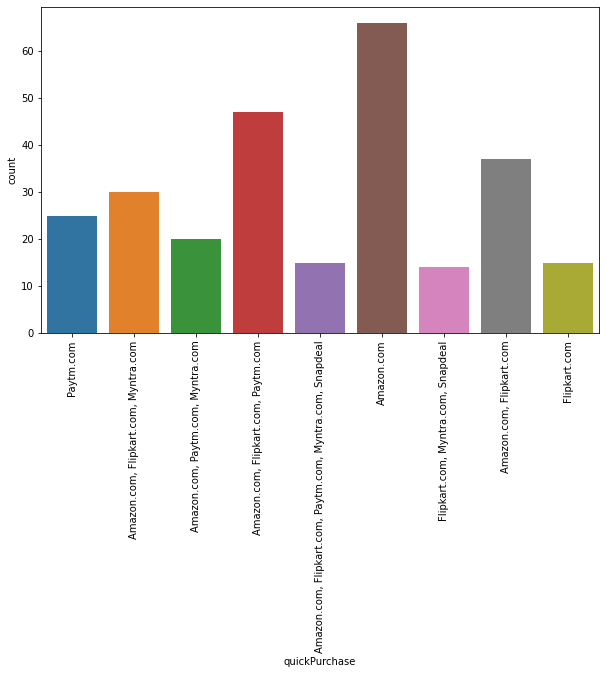

Amazon.com                                                   25.0
Amazon.com, Flipkart.com, Paytm.com                          17.0
Amazon.com, Flipkart.com                                     14.0
Amazon.com, Flipkart.com, Myntra.com                         11.0
Paytm.com                                                     9.0
Amazon.com, Paytm.com, Myntra.com                             7.0
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal     6.0
Flipkart.com                                                  6.0
Flipkart.com, Myntra.com, Snapdeal                            5.0
Name: quickPurchase, dtype: float64 2


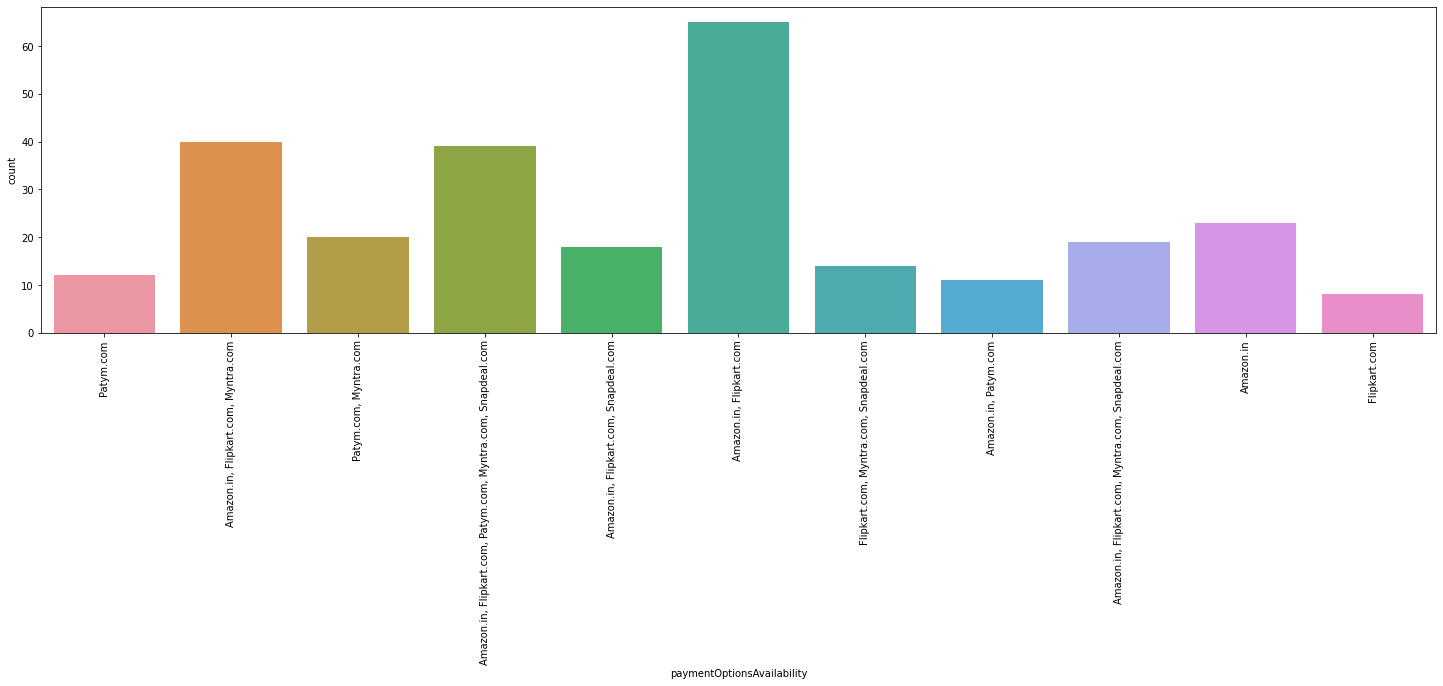

Amazon.in, Flipkart.com                                         24.0
Amazon.in, Flipkart.com, Myntra.com                             15.0
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    14.0
Amazon.in                                                        9.0
Patym.com, Myntra.com                                            7.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                7.0
Amazon.in, Flipkart.com, Snapdeal.com                            7.0
Flipkart.com, Myntra.com, Snapdeal.com                           5.0
Patym.com                                                        4.0
Amazon.in, Patym.com                                             4.0
Flipkart.com                                                     3.0
Name: paymentOptionsAvailability, dtype: float64 2


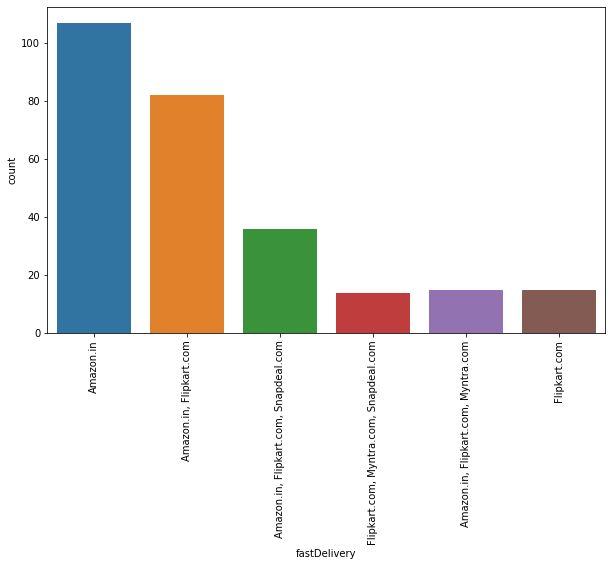

Amazon.in                                 40.0
Amazon.in, Flipkart.com                   30.0
Amazon.in, Flipkart.com, Snapdeal.com     13.0
Amazon.in, Flipkart.com, Myntra.com        6.0
Flipkart.com                               6.0
Flipkart.com, Myntra.com, Snapdeal.com     5.0
Name: fastDelivery, dtype: float64 2


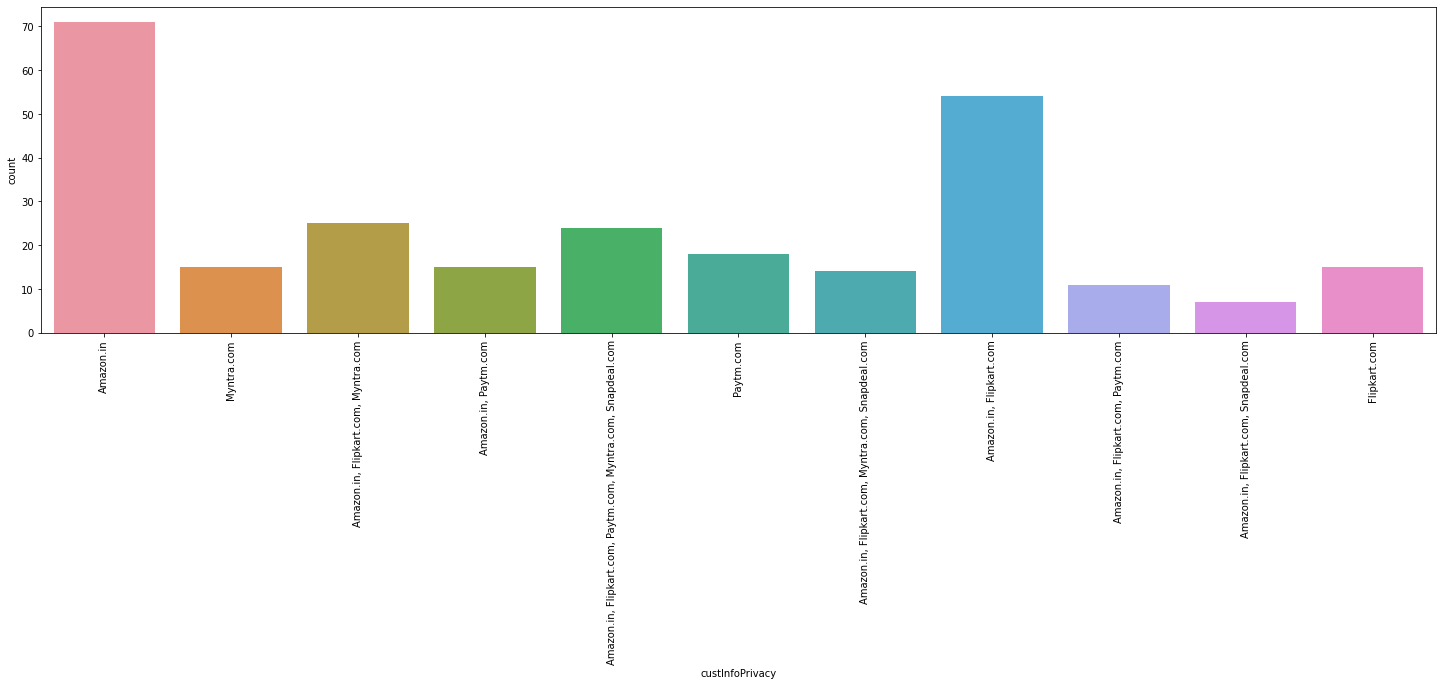

Amazon.in                                                       26.0
Amazon.in, Flipkart.com                                         20.0
Amazon.in, Flipkart.com, Myntra.com                              9.0
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     9.0
Paytm.com                                                        7.0
Myntra.com                                                       6.0
Amazon.in, Paytm.com                                             6.0
Flipkart.com                                                     6.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5.0
Amazon.in, Flipkart.com, Paytm.com                               4.0
Amazon.in, Flipkart.com, Snapdeal.com                            3.0
Name: custInfoPrivacy, dtype: float64 2


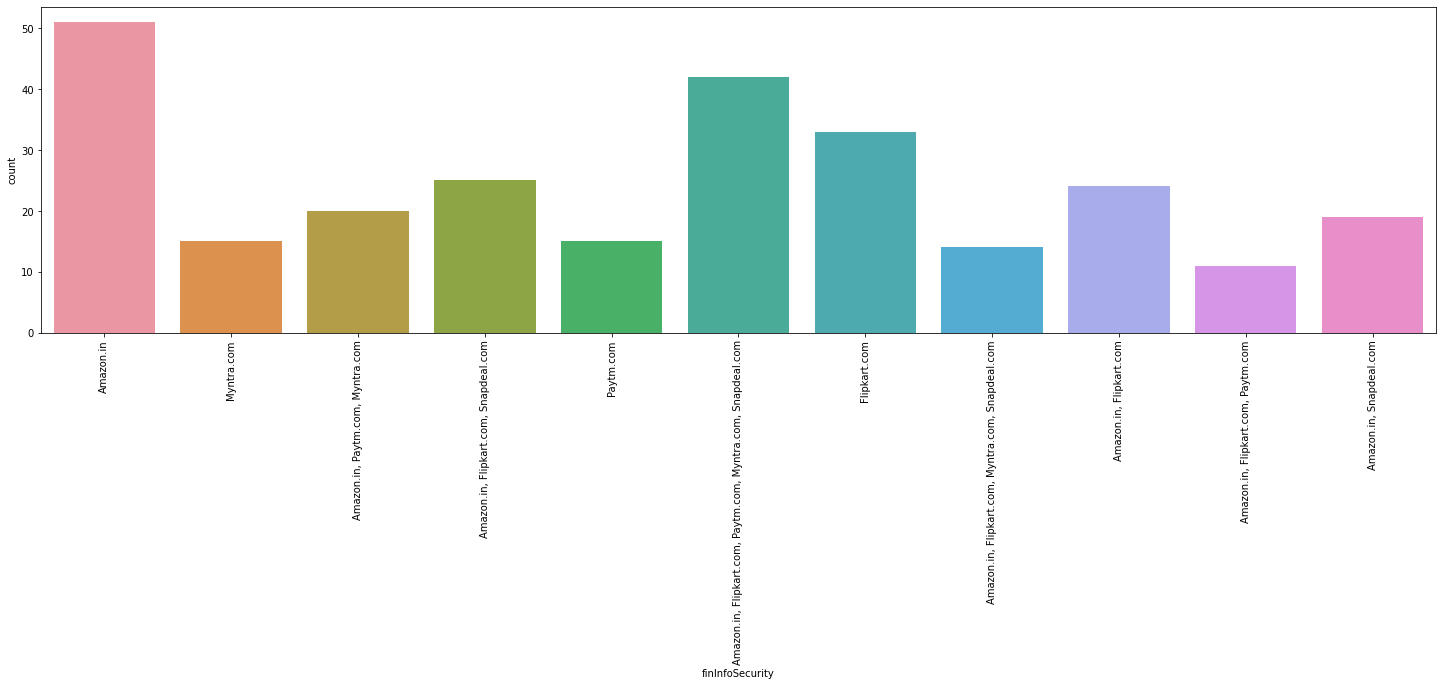

Amazon.in                                                       19.0
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    16.0
Flipkart.com                                                    12.0
Amazon.in, Flipkart.com, Snapdeal.com                            9.0
Amazon.in, Flipkart.com                                          9.0
Amazon.in, Paytm.com, Myntra.com                                 7.0
Amazon.in, Snapdeal.com                                          7.0
Myntra.com                                                       6.0
Paytm.com                                                        6.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5.0
Amazon.in, Flipkart.com, Paytm.com                               4.0
Name: finInfoSecurity, dtype: float64 2


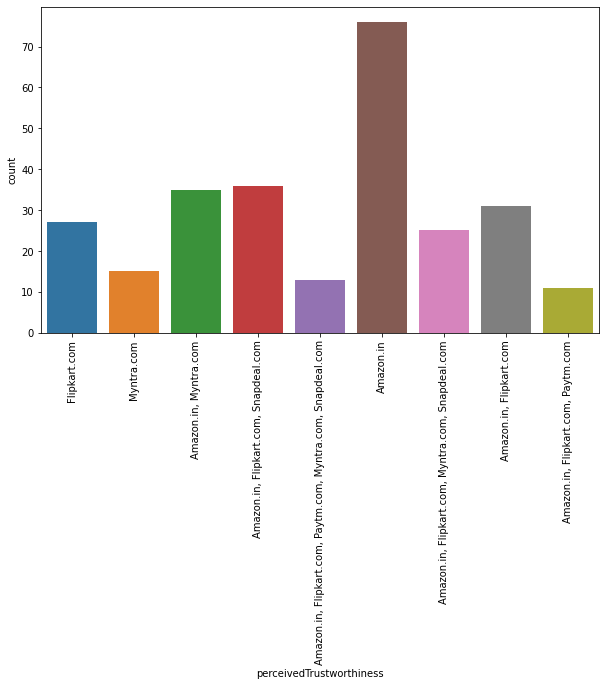

Amazon.in                                                       28.0
Amazon.in, Flipkart.com, Snapdeal.com                           13.0
Amazon.in, Myntra.com                                           13.0
Amazon.in, Flipkart.com                                         12.0
Flipkart.com                                                    10.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                9.0
Myntra.com                                                       6.0
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     5.0
Amazon.in, Flipkart.com, Paytm.com                               4.0
Name: perceivedTrustworthiness, dtype: float64 2


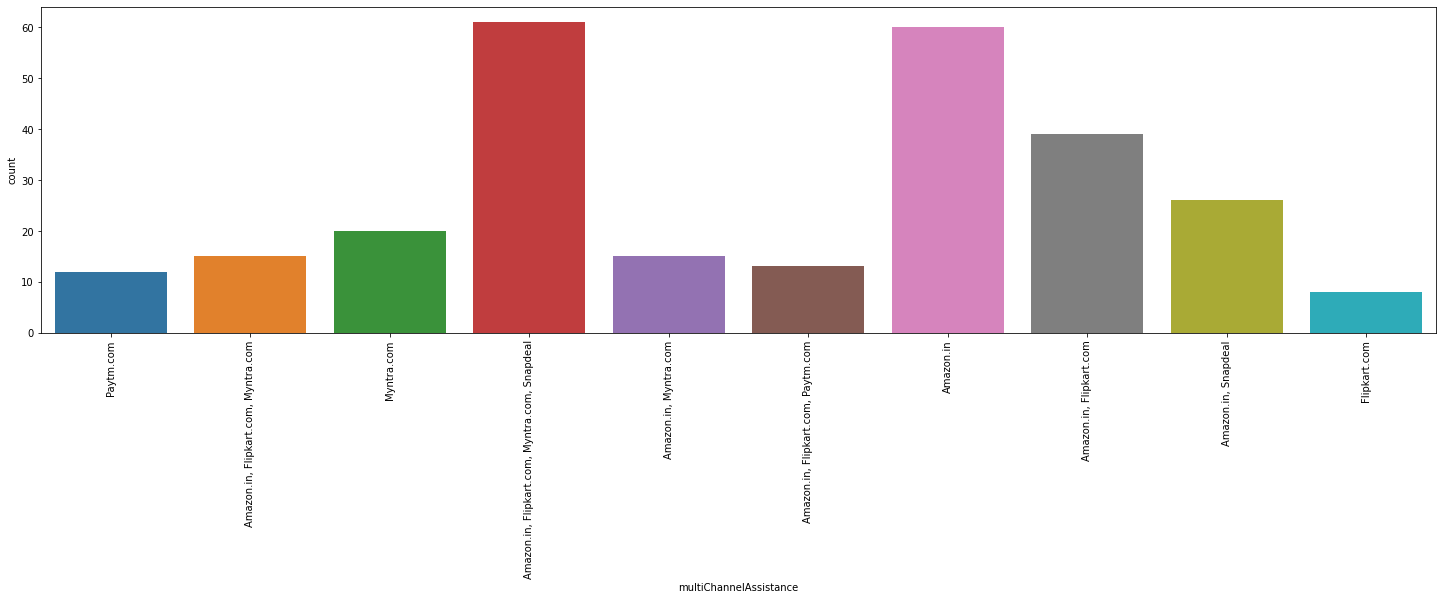

Amazon.in, Flipkart.com, Myntra.com, Snapdeal    23.0
Amazon.in                                        22.0
Amazon.in, Flipkart.com                          14.0
Amazon.in, Snapdeal                              10.0
Myntra.com                                        7.0
Amazon.in, Flipkart.com, Myntra.com               6.0
Amazon.in, Myntra.com                             6.0
Amazon.in, Flipkart.com, Paytm.com                5.0
Paytm.com                                         4.0
Flipkart.com                                      3.0
Name: multiChannelAssistance, dtype: float64 2


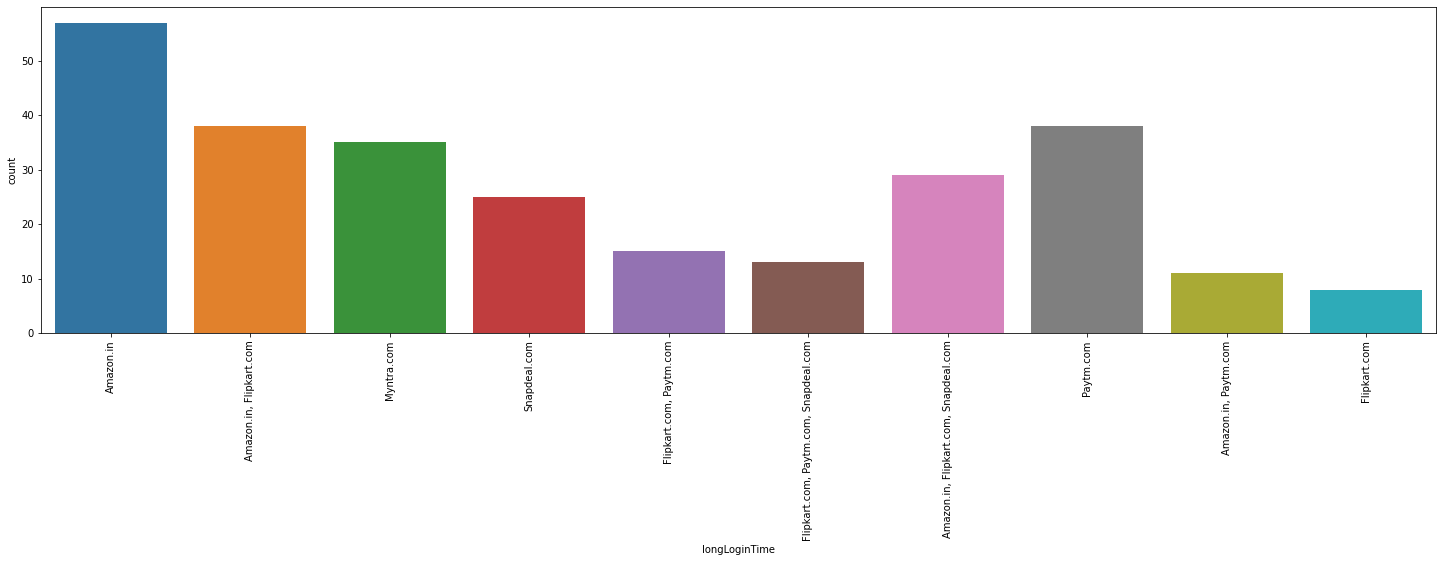

Amazon.in                                21.0
Amazon.in, Flipkart.com                  14.0
Paytm.com                                14.0
Myntra.com                               13.0
Amazon.in, Flipkart.com, Snapdeal.com    11.0
Snapdeal.com                              9.0
Flipkart.com, Paytm.com                   6.0
Flipkart.com, Paytm.com, Snapdeal.com     5.0
Amazon.in, Paytm.com                      4.0
Flipkart.com                              3.0
Name: longLoginTime, dtype: float64 2


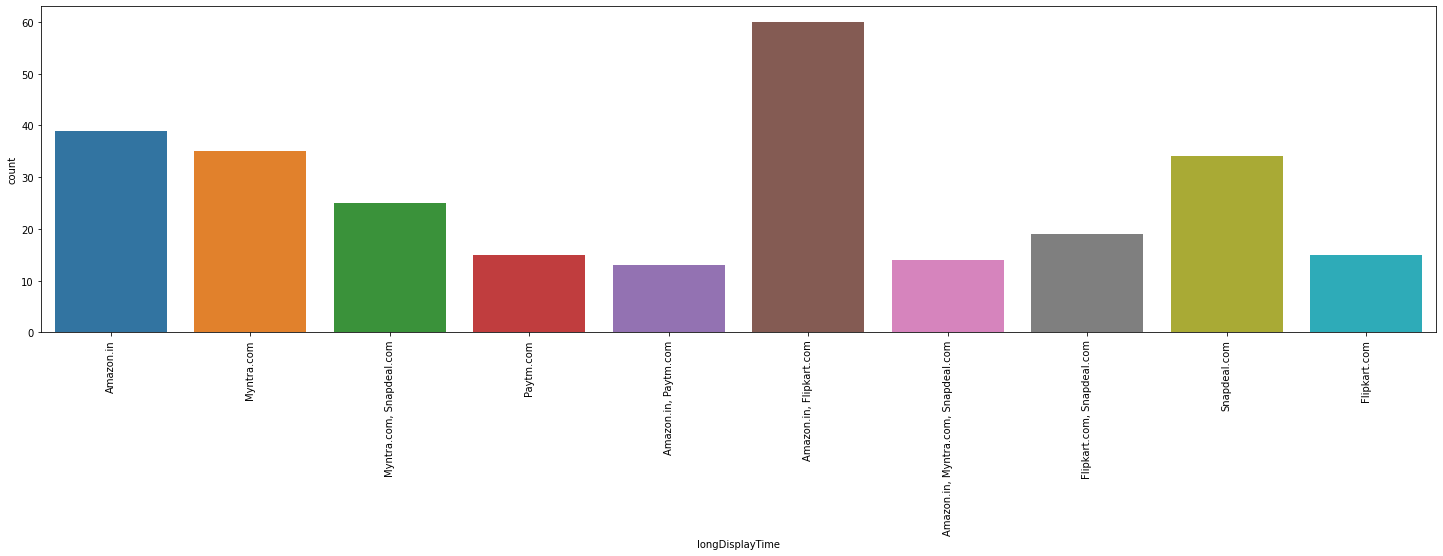

Amazon.in, Flipkart.com                22.0
Amazon.in                              14.0
Myntra.com                             13.0
Snapdeal.com                           13.0
Myntra.com, Snapdeal.com                9.0
Flipkart.com, Snapdeal.com              7.0
Paytm.com                               6.0
Flipkart.com                            6.0
Amazon.in, Myntra.com, Snapdeal.com     5.0
Amazon.in, Paytm.com                    5.0
Name: longDisplayTime, dtype: float64 2


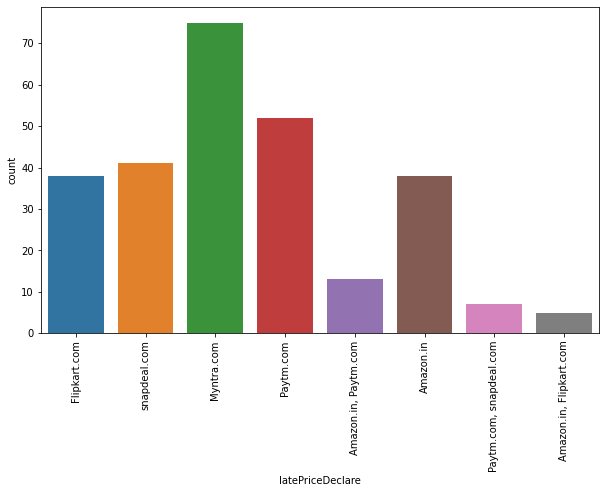

Myntra.com                 28.0
Paytm.com                  19.0
snapdeal.com               15.0
Flipkart.com               14.0
Amazon.in                  14.0
Amazon.in, Paytm.com        5.0
Paytm.com, snapdeal.com     3.0
Amazon.in, Flipkart.com     2.0
Name: latePriceDeclare, dtype: float64 2


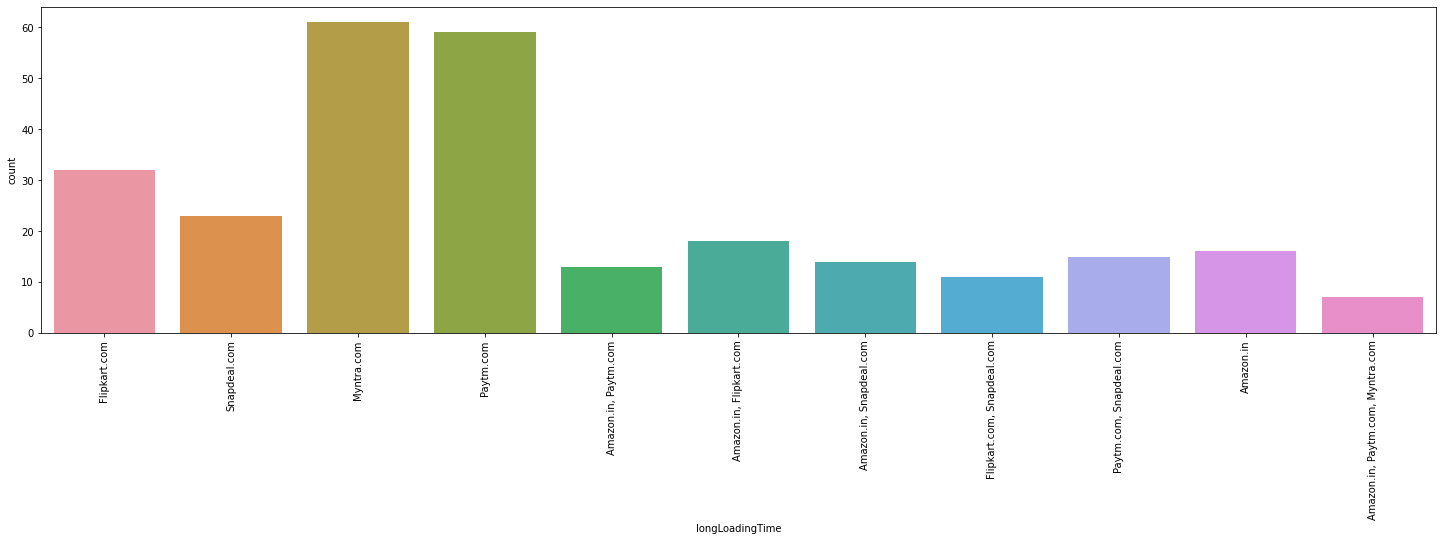

Myntra.com                          23.0
Paytm.com                           22.0
Flipkart.com                        12.0
Snapdeal.com                         9.0
Amazon.in, Flipkart.com              7.0
Amazon.in                            6.0
Paytm.com, Snapdeal.com              6.0
Amazon.in, Snapdeal.com              5.0
Amazon.in, Paytm.com                 5.0
Flipkart.com, Snapdeal.com           4.0
Amazon.in, Paytm.com, Myntra.com     3.0
Name: longLoadingTime, dtype: float64 2


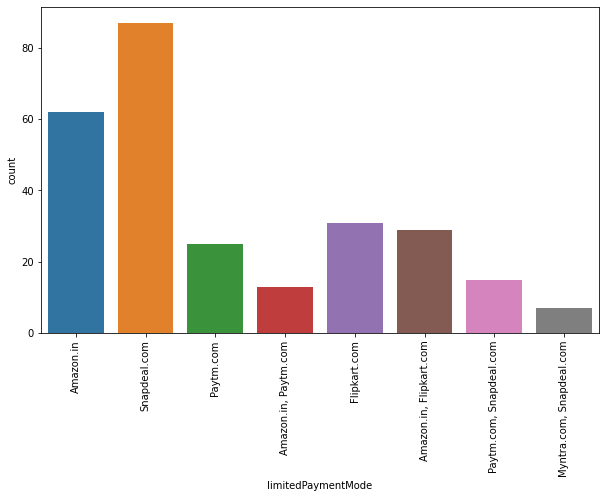

Snapdeal.com                32.0
Amazon.in                   23.0
Flipkart.com                12.0
Amazon.in, Flipkart.com     11.0
Paytm.com                    9.0
Paytm.com, Snapdeal.com      6.0
Amazon.in, Paytm.com         5.0
Myntra.com, Snapdeal.com     3.0
Name: limitedPaymentMode, dtype: float64 2


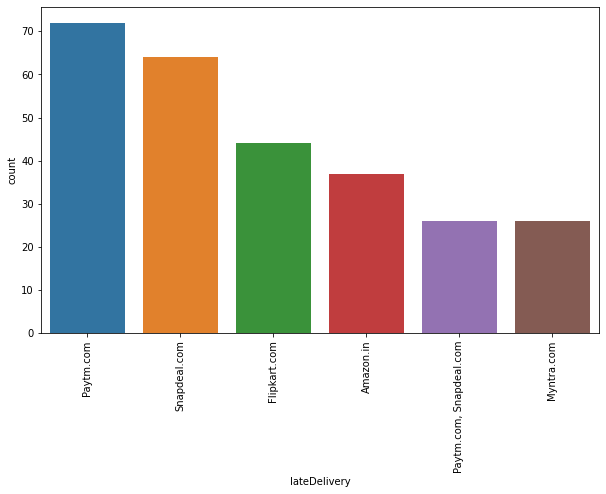

Paytm.com                  27.0
Snapdeal.com               24.0
Flipkart.com               16.0
Amazon.in                  14.0
Paytm.com, Snapdeal.com    10.0
Myntra.com                 10.0
Name: lateDelivery, dtype: float64 2


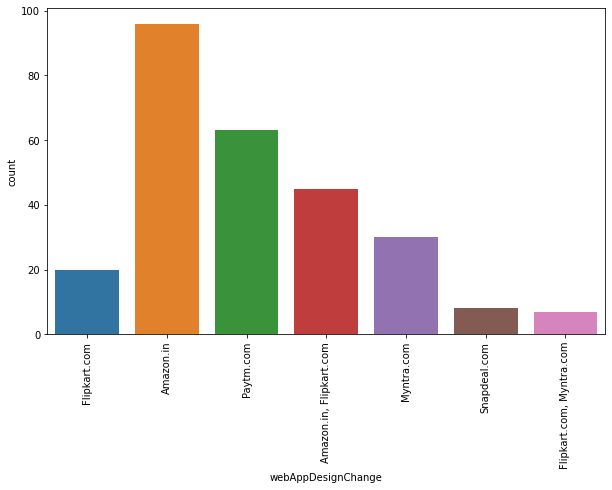

Amazon.in                   36.0
Paytm.com                   23.0
Amazon.in, Flipkart.com     17.0
Myntra.com                  11.0
Flipkart.com                 7.0
Snapdeal.com                 3.0
Flipkart.com, Myntra.com     3.0
Name: webAppDesignChange, dtype: float64 2


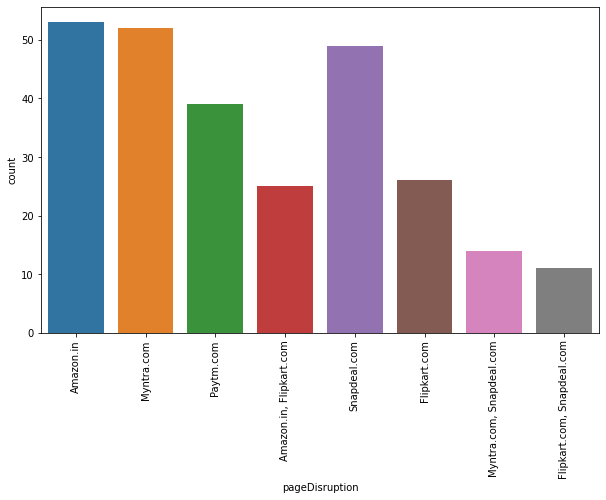

Amazon.in                     20.0
Myntra.com                    19.0
Snapdeal.com                  18.0
Paytm.com                     14.0
Flipkart.com                  10.0
Amazon.in, Flipkart.com        9.0
Myntra.com, Snapdeal.com       5.0
Flipkart.com, Snapdeal.com     4.0
Name: pageDisruption, dtype: float64 2


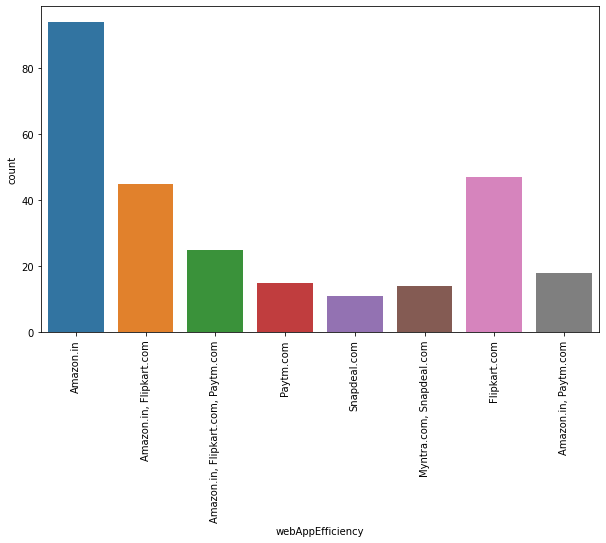

Amazon.in                             35.0
Flipkart.com                          17.0
Amazon.in, Flipkart.com               17.0
Amazon.in, Flipkart.com, Paytm.com     9.0
Amazon.in, Paytm.com                   7.0
Paytm.com                              6.0
Myntra.com, Snapdeal.com               5.0
Snapdeal.com                           4.0
Name: webAppEfficiency, dtype: float64 2


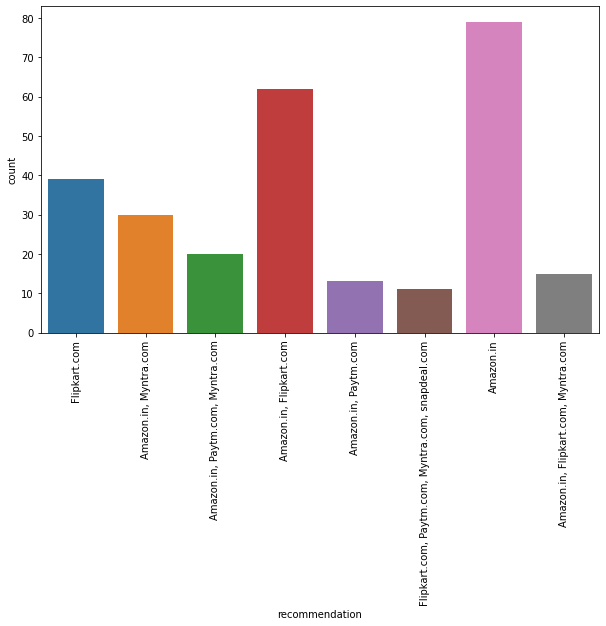

Amazon.in                                            29.0
Amazon.in, Flipkart.com                              23.0
Flipkart.com                                         14.0
Amazon.in, Myntra.com                                11.0
Amazon.in, Paytm.com, Myntra.com                      7.0
Amazon.in, Flipkart.com, Myntra.com                   6.0
Amazon.in, Paytm.com                                  5.0
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com     4.0
Name: recommendation, dtype: float64 2


In [36]:
for i in categorical:
    value_count(i)

Observation:
• Female customers (67%) are more than male customers

• Customers between 20 to 50 years shopped more from the online store. 75 % of customers are between 20 to 50

• Delhi, Bangalore, Noida are the cities with high number of buyers

• 36% customers were found shopping online for more than 4 years , 24% were shopping for 2-3 years

• IN last one year 42% customers have purchased online less than 10 times,23% customers purchased 31-40 times only 2 percent customers purchased more than 42 times

• 70% customers used mobile internet for online purchase

• 52% customers used Smartphone for online purchase, 32% used laptop least 4% used tablet

• 45% customers use Windows phone

• 80% customers used Google chrome for online purchase

• 86% customers uses Search engine to reach their favorite online store

• After first visit 32 % customers used search engine to reach online store and 32% uses application. We can assume that these customers have been retained by the E commerce website as they have downloaded the application on their phone and have a fair chance of shopping again. Also, there are a few customers who are using Desktop/Laptop, for which, there are no applications for online shopping and you have to stick with the web browser.

• 46% customers take at least 15 minutes before making a purchase, 26% take 6-10 minutes only

• 55% customers prefer Credit/Debit cards to make payments ,28% preferred COD and 17 % preferred Wallets

• 64% customers abandon their shopping cart sometimes, 19% abandon their cart frequently

• 49% customers abandon their bag due to better alternative offer, 20% abandon due to promo code not applicable

• 61% customers have strongly agreed to have easy website content which is easy to understand

• 43% customers agree that Information on similar product to the one highlighted is important for product comparison.

• 70% customers agree that Complete information on listed seller and product being offered is important for purchase decision

• 90% customers agree all relevant information on listed products must be stated clearly.

• 90% customers agreed that the website should be easily navigable

• 85% customers had no issues with the loading and processing speed

• 87% customers agree with user friendly website interface. The online stores should invest heavily in creating user friendly apps and websites, so that the customers do not have to work around much and the overall shopping experience is smooth.

• 59% customers strongly agree with the convenient paying methods. The reluctance to make online payments is gradually reducing. The acceptance has been built by addressing the trust issue over time by giving customers an option to pay online or to pay Cash On Delivery (COD)

• 52% customers trust that online store will fulfill its part of transaction at stipulated time

• 85% customers like the organization's readiness to assist with queries

• Being able to guarantee the privacy of the customer: This also got 69% strongly agree. Costumers are concerned about the unauthorized access to their data. Protecting user privacy will enable stores to drive more revenue and gain more customers

• Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.): 90% customers agreed to it. In case one channel is not available, customers can reach out to multiple channels which again is an important factor. Being able to communicate easily can make the difference in both their shopping experience as well as fulfill business goals of online store.

• 50% agree that online shopping gives monetary benefit and discounts to the customer: Most online shopping sites offer amazing round-the-year discounts. Banks and Digital Wallets have happily jumped on the online shopping bandwagon by providing Reward Points, and instant Cashback offers in addition to brand discounts, which will help to gain new customers

• 60% customers enjoys online shopping

• 84% customers agree that online shopping is convenient and flexible:

• 90% customers agree that return and replacement policy helps them making purchase decision. It is evident from the fact that people cannot actually try & touch the products, they are purchasing before it reaches home and they would want to return or replace in case of dissatisfaction. Online shopping websites should make strategies around easy return and replacement policy if they want to retain their customers.

• Around 50% customers agree that gaining access to loyalty program is a benefit of shopping online

• Displaying quality Information on the website improves satisfaction of customers: 80% customer agreed to it. It means displaying quality information have a significant association with customer satisfaction, and repurchase intentions

• 95% customers are satisfied while shopping on a good quality website

• Net Benefit derived from shopping online can lead to users satisfaction:90% customers agreed

• User satisfaction cannot exist without trust: 85% customers agree that customer satisfaction cannot be built without trust. Trust is important factor to attract e-commerce buyers. So, it is important for companies to learn how to manage consumers' trust

• Offering a wide variety of listed product in several categories: 75% use agreed.

• 86% customers like to have complete and relevant information

• 80% customers agree to receive monetary savings while shopping online

• 50% agree with the convenience of patronizing the online retailer

• 50% customers agree that online shopping give the sense of adventure

• only 30% customers agree that online shopping enhances their social status

• 45% customers feel gratified while shopping with their favorite retailer

• 45% customers feel that shopping online helps them fulfill certain roles

• 85% customers agree they get value for their money while shopping online

Observations from Multiple Options based Questions i.e. related to company name specific parameters, after 47th rows

• Maximum people have shopped from these 5 companies - Amazon.in, Flipkart.com, Paytm.com, Myntra.com, and Snapdeal.com.

• 48% customers says flipkart, amazon shows wide variety of products

• 37% customers like flipkart and amazon in terms of displaying complete and relevant information of the products

• In terms of speed Amazon.in is liked by 90% customers , 60 % like Flipkart , 27% Myntra

• 78% customers trust Amazon to be reliable , 55% likes flipkart , 25% Myntra

• 80% customers likes Amazon's quickness to complete the purchase , 60% likes Flipart's, 30% likes Myntra's

• 86% likes Amazon's delivery speed , 56% likes Flipkart's , 5% likes Myntra's

• 82% customers trust amazon in terms of keeping the privacy of their data, 56% trust flipkart 20% trust Myntra , 12 % trust Snapdeal

• 70% trust amazon in terms of keeping their financial information secured, 56% Flipakrt, 34% Myntra , 21% Snapdeal , 22@ Paytm

• 84% customers believe Amazon perceived trustworthiness, 43% - Flipkart , 33% - Myntra ,Snapdeal 27% Snapdeal

• 86% customers like Amazon in terms of online assistance through multi-channel , 51% -Flipkart ,42% Myntra

• 50% customers agree that Amazon takes longer time to log them in while in sales period/promotions , 39% goes with flipkart, 13% goes with Myntra , 16% Snapdeal

• 46% customers says that amazon takes longer time in displaying photos in sales/promotion , 35%- flipkart, 21% Snapdeal, 14% Myntra, 11% Paytm

• In terms of late declaration of price in promotion/sales 28% goes with Myntra, 21% amazon , 16% flipkart , 18% Snapdeal, 23% Paytm

• In terms of longer page loading in promotion/sales 26% customer goes with Myntra, 23% flipkart, 23% amazon, 24% Snapdeal

• In terms of limited mode of payment on most products during sales period/promotions 41% goes with Snapdeal, 40% -amazon, 23% flipkart, 20% Paytm and only 3% Myntra. Hence Myntra gives most payment options during sales/promotion.

• In terms of time taken in product delivery Paytm has highest votes of 37%, Snapdeal 24%, flipkart 16%, amazon 14% and Snapdeal and Myntra 10%. Hence Snapdeal and Myntra take minimum time for delivery among all.

• 20% customers dislikes disruptions while moving to another page on amazon, 24% on Myntra, 27% Snapdeal, 14% Paytm, 23% Snapdeal

• 61% customers says that amazon website is as efficient as before, 43% for flipkart, 22% for Paytm, 9% for Snapdeal

• 81% customers would like to recommend amazon to a friend, 43% would like flipkart , 22% would like for Myntra , 9% for Paytm and least 4 % would like to recommend Snapdeal

In [37]:
def value_count(column):
    diff_count=len(data[column].value_counts())
    if diff_count<5:
        plt.figure(figsize=(10,5))
    elif diff_count<10:
        plt.figure(figsize=(10,6))
        plt.xticks(rotation=90)
    elif diff_count<20:
        plt.figure(figsize=(25,6))
        plt.xticks(rotation=90)
    else:
        plt.figure(figsize=(20,6))
        plt.xticks(rotation=90)
    sns.countplot(x=column,hue='gender',data=data)
    plt.show()

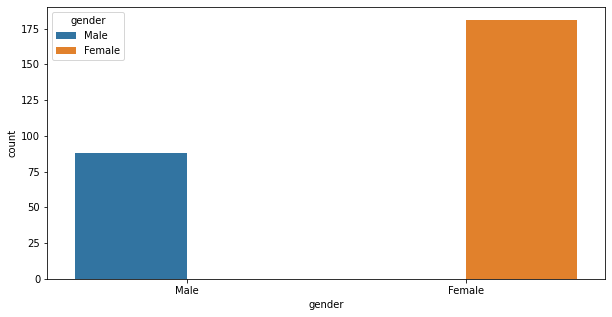

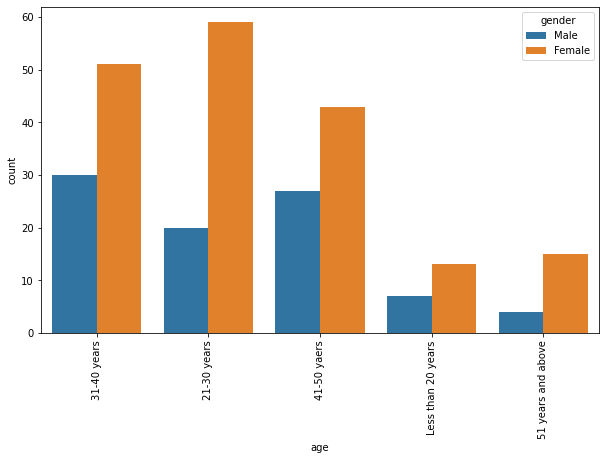

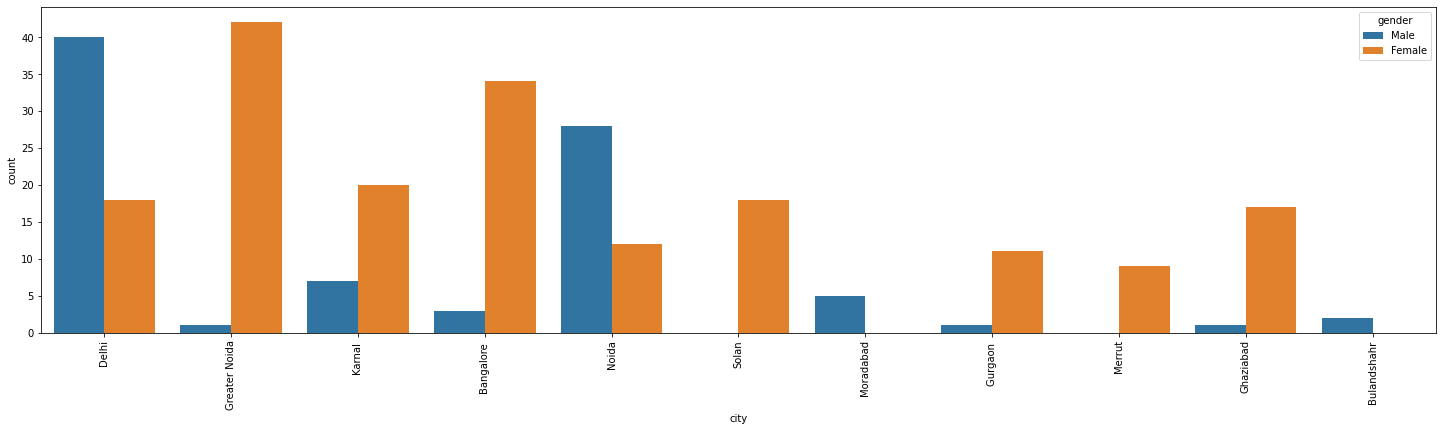

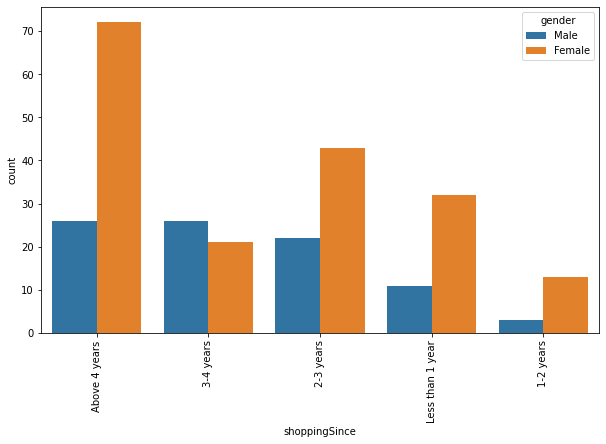

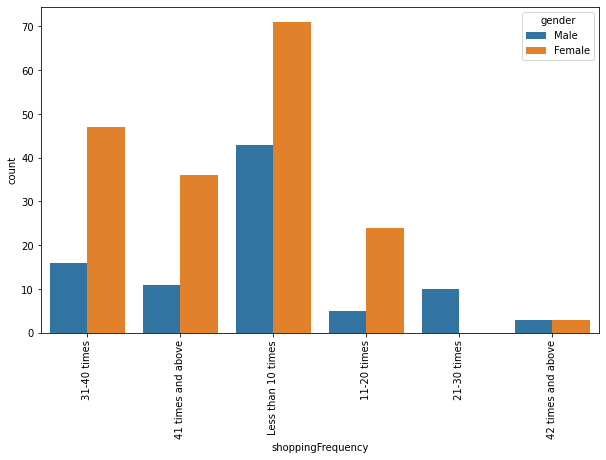

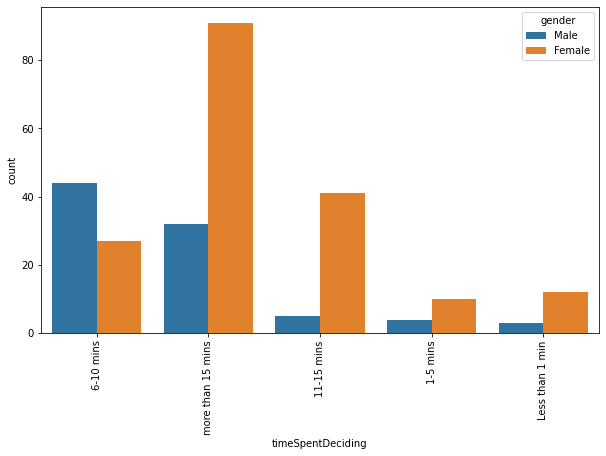

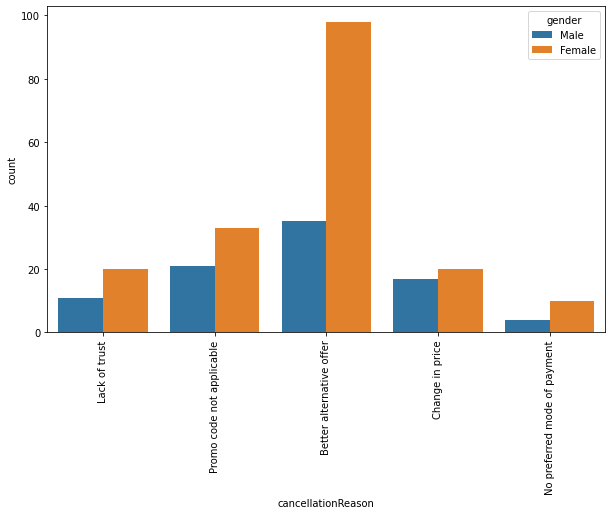

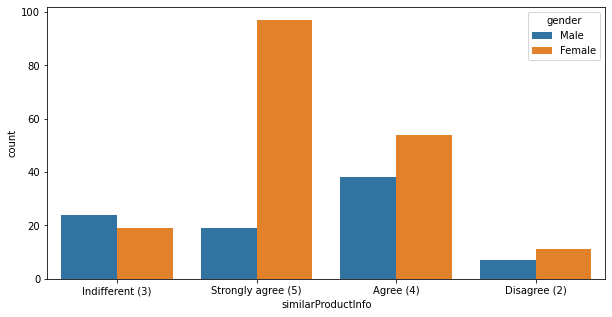

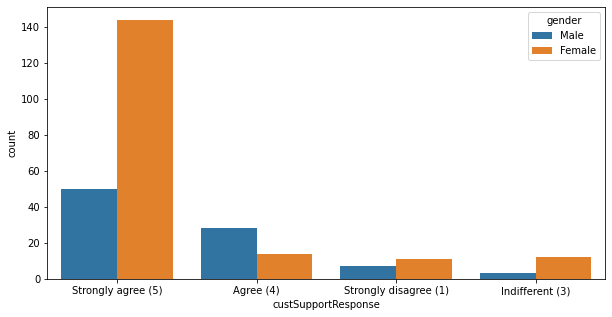

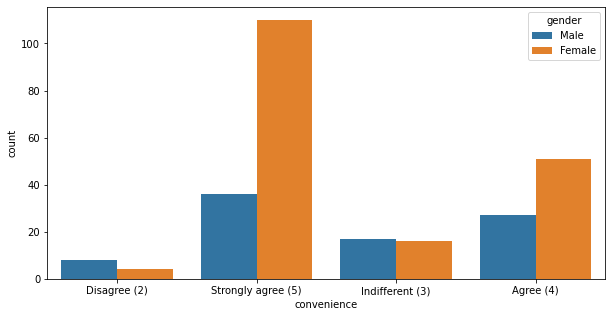

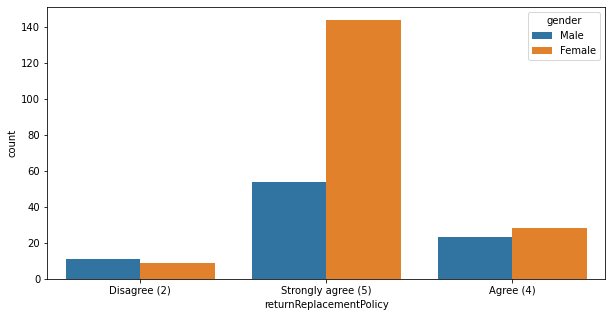

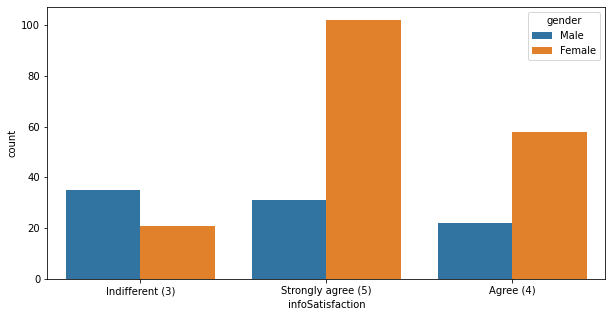

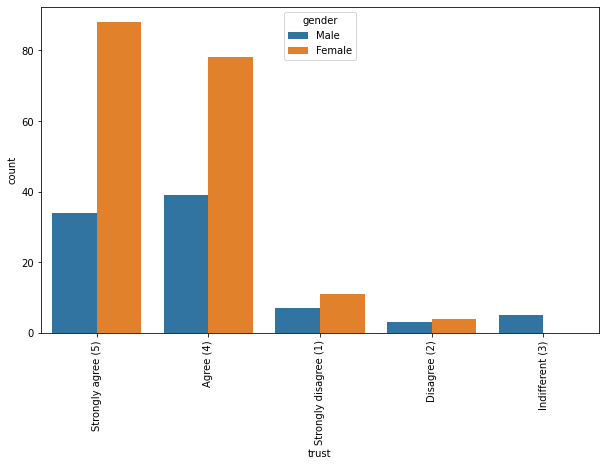

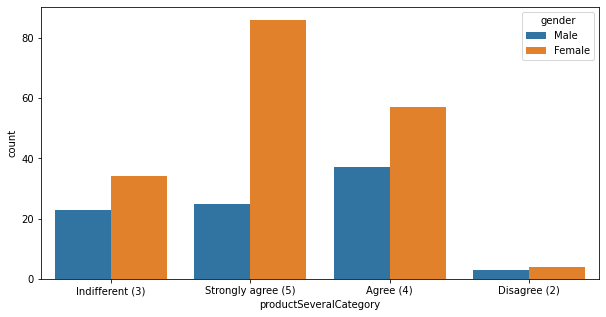

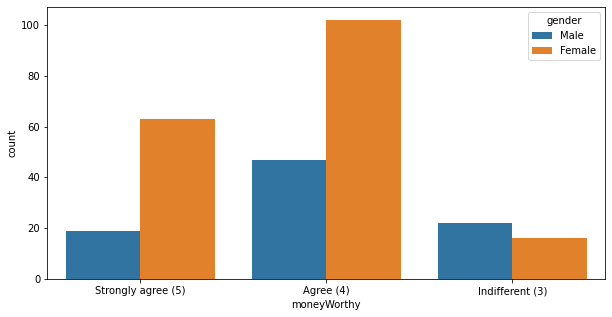

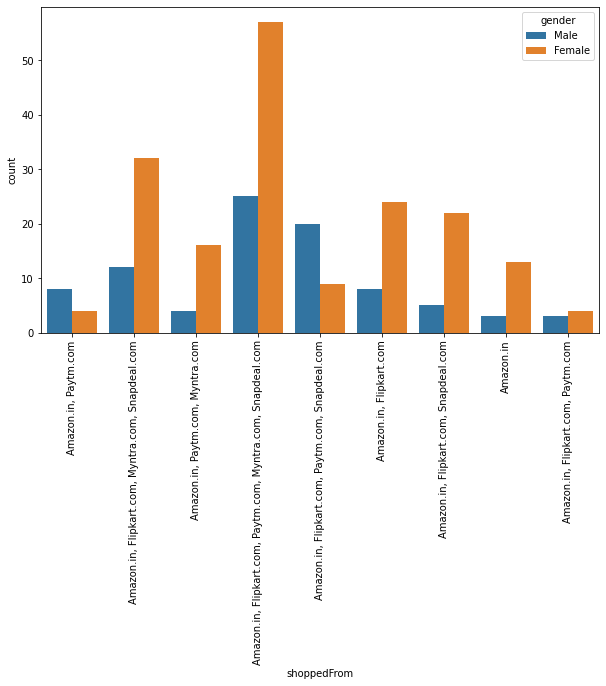

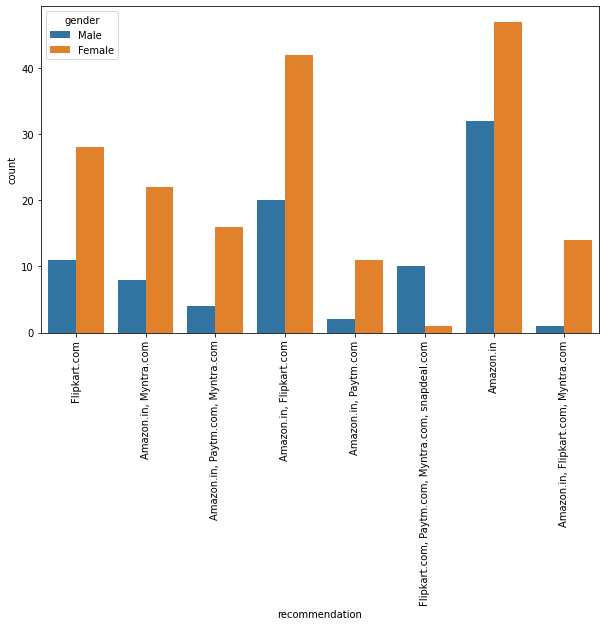

In [38]:
data2=data.iloc[:,[0,1,2,4,5,13,16,18,26,31,32,34,37,38,46,47,70]]
for i in data2:
    value_count(i)

Observation
• Even though females are dominant in the dataset, female population using ecommerce is not dominant everywhere In Delhi and Noida more numbers of males are using ecommerce than female.

• Bulandshahr and Moradabad - both cities in Uttar Pradesh has no female shoppers at all.

• Numbers of females who are shopping since long are more than number of males.

• Frequency of females shopping online is more than males

• Most of the females usually take more than 15 meanwhile most of the male spend 6-10 min before making a purchase decision.

• More females strongly agree with the fact that there must be similar products to compare. Males do agree with the fact but the data suggests that it is okay if there exists a product but also okay if there does not exist one.

Text(0.5, 1.0, 'Correlation between variables: ')

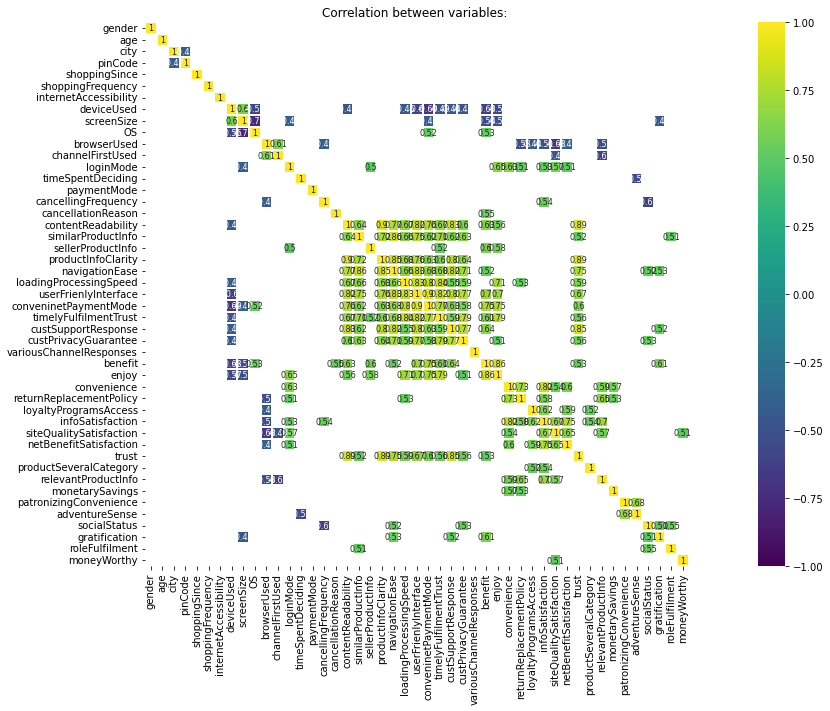

In [40]:
# Let's find the columns which has more correlation - for people to purchase online and the app that they use : 

data = encoded_data.iloc[:,:47]
le = LabelEncoder()
data['city'] = le.fit_transform(data['city'])

corr =data.corr()
plt.figure(figsize=(25, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.title("Correlation between variables: ")

Observation:

From the data we can see that, data related to how the person is accessing the app or website does not matter as it has negative correlation.

Customer retention can be done, majorly with customer reviews and by finding out if they are satisfied with the quality of product and experience delivered to them.

In [41]:
# Let's check the Age groups by which cutomers shops the most

age_count = pd.DataFrame(data['age'].value_counts()).reset_index()
age_count.columns = ['ageGroup','count']


fig = px.bar(age_count, x='ageGroup',y='count',
             color='count',
             title = 'Online Shopping Trend in different Age Groups: ')
fig.show()

Observations :

As expected, people who is between 20 to 50 years old, they prefer online shopping more than senior citizens or teenagers.

We can also assume that, people with 31-40 years will not have much time to go out and shop, hence they will prefer online shopping more.

In [42]:
# Let's check tge gender ratio to check who are the most shoppers - males or females?

gender_ratio= data[['age','gender']]
gender_ratio['gender'] = pd.DataFrame(encoded_data['gender']).astype('int64')
gender_ratio = gender_ratio[:269]

unique_age_group = list(gender_ratio.groupby('age'))

rows = 2
columns = 3
subplot_titles = [age[0] for age in unique_age_group]
specs = [[{'type':'domain'}] * columns] * rows
#specs = [[{'type':'domain'}] * cols] * rows

fig = make_subplots(
        rows = rows,
        cols = columns,
        subplot_titles = subplot_titles,
        specs = specs,
        print_grid = False)

#i=group number
#l=data in each group
for i,l in enumerate(unique_age_group):
    row = i // columns + 1
    col = i % (rows + 1) + 1
    age = l[0]
    data = pd.DataFrame(l[1])
    
    df = data.groupby('gender').size().reset_index()
    df.columns=['gender','count']
    val = pd.Series(df['count']).array
    
    colors = ['lightgreen','darkorange']
    fig.add_trace(go.Pie(
                    labels = ['Male','Female'],
                    values=val,
                    showlegend = True,
                    textposition='inside'
                    ),
                 row=row,
                 col=col
           )
    fig.update_traces(hoverinfo='label+percent', marker=dict(colors=colors)) 
    fig.update_layout(title='Who shops the most?', title_x=0.5)
fig.show()
    
    

Observation:

We can observe from these pie charts that, in all age groups, more than 50% of the sample, it is women who does more online shopping when compared to men.

CONCLUSION:

Customer retention doesn't improve overnight. Customer retention is fickle when customer service is lacking. Few ways to improve customer retention can be as follows:

• Easily navigable : 90% customers agreed that the website should be easily navigable. Website navigation is a key to the success of any e-commerce website. It should be clean, clear and user-friendly. Online store should create easy-to-use navigation on website to make sure that, customers don’t get confused while surfing the site.

• User-friendly websites: 87% customers agree with user friendly website interface. The online stores should invest heavily in creating user friendly apps and websites, so that the customers do not have to work around much and the overall shopping experience is smooth,& shoppers get what they want faster and without running into unnecessary complexity that can clog up the path to purchase. It should focus on the user experience by providing shopping categories, filters, and comparison capabilities. User-friendliness requires that your website works on all browsers and devices

• Improve return & refund policy: Return policies are an essential feature of any ecommerce website .90% customers agree that return and replacement policy helps them making purchase decision. It is evident from the fact that people cannot actually try & touch the products ,they are purchasing before it reaches home and they would want to return or replace in case of dissatisfaction. Online shopping websites should make strategies around easy return and replacement policy if they want to retain their customers. This is another trust-building feature of online selling. ,which reassures buyers that if they are unhappy or just need a different size, the brand is there for them.

• Privacy Policy: Being able to guarantee the privacy of the customer:92% Customer agreed to this. Costumers are concerned about the unauthorized access to their data. Building trust with the customers is crucial for any e-commerce website. An e-commerce privacy policy statement makes business more transparent regarding how you collect, manage, and use data from site visitors.

• Displaying quality Information on the website : 90% customers agree all relevant information on listed products must be stated clearly. Content is one of the crucial challenges for any e-commerce website. it’s simply not enough to just list a product name and image on a product page and expect the orders to roll in. Compiling a compelling array of product data, whether that’s dimensions, MPNs or spec sheets can all help to convert customers better.

• Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.): 90% customers agreed to it. In case one channel is not available, customers can reach out to multiple channels which again is an important factor. Being able to communicate easily can make the difference in both their shopping experience as well as fulfill business goals of online store.

When customers are satisfied with a company or service, there is a high possibility that they will share their experience with other people Therefore it is crucial for E-commerce to take into account their customer satisfaction because this will retain customer loyalty as well as attract potential customers.